<a href="https://colab.research.google.com/github/KarolMc/msc_dissertation/blob/main/XGBoostGPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall xgboost
!pip install xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.8/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.4 MB/s eta 0:00:00


In [2]:
import pandas as pd

import numpy as np

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import StandardScaler
import xgboost
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer

In [3]:
import random

random_seed = random.seed(42)

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/X_train_ROS.csv', index_col=[0])
y_train = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/y_train_ROS.csv', index_col=[0])
X_test = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/X_test.csv', index_col=[0])
y_test = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/y_test.csv', index_col=[0])

In [35]:
features = X_train.columns

In [5]:
y_test.value_counts()

Diabetes_status
1                  8419
2                  2692
3                  1067
dtype: int64

In [6]:
y_train.value_counts()

Diabetes_status
1                  25265
2                  25265
3                  25265
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
y_test = le.fit_transform(y_test)

In [9]:
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
#store data, all in numpy arrays
training_data = {'X_train':X_train_val,'Y_train':y_train_val,
                'X_val': X_validation,'Y_val':y_validation,
                'X_test': X_test,'Y_test':y_test}


In [11]:
# Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=random_seed,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   38.2s finished


RandomForestClassifier(verbose=1)

In [13]:
predicted_labels = clf.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [14]:
accuracy_score(training_data['Y_test'], predicted_labels)



0.7683527672852685

In [15]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.748 total time=  12.8s
[CV 2/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.752 total time=  11.5s
[CV 3/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


[CV 3/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.754 total time=  17.5s
[CV 4/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.756 total time=  11.9s
[CV 5/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.757 total time=  14.2s
[CV 1/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.750 total time=  19.9s
[CV 2/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.756 total time=  18.3s
[CV 3/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.760 total time=  20.2s
[CV 4/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.758 total time=  18.7s
[CV 5/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.757 total time=  18.4s
[CV 1/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


[CV 1/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.756 total time=  27.5s
[CV 2/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.749 total time=  28.6s
[CV 3/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.756 total time=  23.0s
[CV 4/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.758 total time=  22.8s
[CV 5/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.756 total time=  25.8s
[CV 1/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.751 total time=  28.8s
[CV 2/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   27.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.753 total time=  28.2s
[CV 3/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   29.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.753 total time=  30.4s
[CV 4/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   27.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.755 total time=  28.4s
[CV 5/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   27.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.757 total time=  28.3s
[CV 1/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   35.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.751 total time=  36.3s
[CV 2/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   33.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.751 total time=  33.9s
[CV 3/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   34.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.755 total time=  35.4s
[CV 4/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   33.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.758 total time=  33.9s
[CV 5/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   33.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.753 total time=  33.9s
[CV 1/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.753 total time=  40.8s
[CV 2/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.754 total time=  40.1s
[CV 3/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.755 total time=  40.7s
[CV 4/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   38.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.757 total time=  39.6s
[CV 5/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.758 total time=  40.8s
[CV 1/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.749 total time=  45.2s
[CV 2/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.750 total time=  45.9s
[CV 3/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.755 total time=  45.5s
[CV 4/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.758 total time=  46.6s
[CV 5/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished


[CV 5/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.757 total time=  45.2s
[CV 1/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished


[CV 1/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.749 total time=  53.5s
[CV 2/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished


[CV 2/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.750 total time=  50.4s
[CV 3/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished


[CV 3/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.754 total time=  51.8s
[CV 4/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   50.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished


[CV 4/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.756 total time=  51.7s
[CV 5/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   49.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.757 total time=  50.7s
[CV 1/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.784 total time=  12.9s
[CV 2/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.781 total time=  14.0s
[CV 3/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.787 total time=  12.7s
[CV 4/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.786 total time=  12.8s
[CV 5/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.786 total time=  12.8s
[CV 1/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.787 total time=  19.2s
[CV 2/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.782 total time=  20.3s
[CV 3/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.789 total time=  19.3s
[CV 4/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.789 total time=  19.2s
[CV 5/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.784 total time=  19.2s
[CV 1/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.786 total time=  26.0s
[CV 2/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.784 total time=  27.2s
[CV 3/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.784 total time=  25.8s
[CV 4/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished


[CV 4/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.792 total time=  26.0s
[CV 5/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.785 total time=  26.4s
[CV 1/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.783 total time=  32.1s
[CV 2/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.785 total time=  31.9s
[CV 3/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   32.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.791 total time=  33.3s
[CV 4/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.789 total time=  31.8s
[CV 5/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   32.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.783 total time=  33.0s
[CV 1/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.785 total time=  38.0s
[CV 2/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.784 total time=  37.0s
[CV 3/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.787 total time=  38.2s
[CV 4/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   36.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.787 total time=  36.9s
[CV 5/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.783 total time=  38.4s
[CV 1/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.786 total time=  43.1s
[CV 2/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   43.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.785 total time=  43.9s
[CV 3/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.785 total time=  42.9s
[CV 4/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   42.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.792 total time=  43.8s
[CV 5/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   41.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.789 total time=  42.7s
[CV 1/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.789 total time=  50.1s
[CV 2/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.782 total time=  49.9s
[CV 3/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished


[CV 3/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.790 total time=  49.5s
[CV 4/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   49.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.790 total time=  50.5s
[CV 5/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   48.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished


[CV 5/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.785 total time=  49.3s
[CV 1/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   54.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished


[CV 1/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.784 total time=  56.0s
[CV 2/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   57.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished


[CV 2/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.782 total time=  58.4s
[CV 3/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished


[CV 3/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.788 total time=  55.2s
[CV 4/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished


[CV 4/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.790 total time=  56.2s
[CV 5/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.788 total time=  56.1s
[CV 1/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.818 total time=  13.6s
[CV 2/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.818 total time=  13.5s
[CV 3/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.820 total time=  13.7s
[CV 4/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.818 total time=  13.6s
[CV 5/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.813 total time=  14.8s
[CV 1/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.818 total time=  20.5s
[CV 2/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.812 total time=  20.2s
[CV 3/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.826 total time=  20.4s
[CV 4/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.820 total time=  20.9s
[CV 5/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.819 total time=  21.1s
[CV 1/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.816 total time=  27.3s
[CV 2/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.816 total time=  27.1s
[CV 3/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   27.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.824 total time=  28.5s
[CV 4/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.821 total time=  27.2s
[CV 5/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.820 total time=  27.3s
[CV 1/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   34.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.821 total time=  35.3s
[CV 2/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   34.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.814 total time=  35.2s
[CV 3/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   35.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.823 total time=  36.5s
[CV 4/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.821 total time=  34.1s
[CV 5/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.821 total time=  33.8s
[CV 1/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.820 total time=  41.6s
[CV 2/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.813 total time=  42.0s
[CV 3/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.818 total time=  41.6s
[CV 4/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   39.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.820 total time=  40.7s
[CV 5/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


[CV 5/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.819 total time=  41.7s
[CV 1/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.819 total time=  48.4s
[CV 2/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.814 total time=  47.8s
[CV 3/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.823 total time=  48.8s
[CV 4/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.823 total time=  47.7s
[CV 5/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.818 total time=  48.5s
[CV 1/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.819 total time=  55.7s
[CV 2/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.818 total time=  54.3s
[CV 3/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.822 total time=  55.5s
[CV 4/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   54.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.823 total time=  55.4s
[CV 5/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.822 total time=  54.5s
[CV 1/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished


[CV 1/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.817 total time= 1.0min
[CV 2/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished


[CV 2/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.818 total time= 1.0min
[CV 3/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished


[CV 3/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.823 total time= 1.0min
[CV 4/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   59.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished


[CV 4/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.820 total time= 1.0min
[CV 5/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.820 total time= 1.0min
[CV 1/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.850 total time=  14.9s
[CV 2/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.844 total time=  16.3s
[CV 3/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.854 total time=  14.9s
[CV 4/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.849 total time=  14.9s
[CV 5/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.849 total time=  14.9s
[CV 1/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.850 total time=  22.5s
[CV 2/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.847 total time=  23.5s
[CV 3/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.850 total time=  22.4s
[CV 4/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.852 total time=  22.4s
[CV 5/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


[CV 5/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.847 total time=  23.4s
[CV 1/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.849 total time=  30.1s
[CV 2/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.844 total time=  29.7s
[CV 3/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


[CV 3/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.856 total time=  30.7s
[CV 4/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.852 total time=  30.3s
[CV 5/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.850 total time=  29.9s
[CV 1/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.851 total time=  38.6s
[CV 2/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   36.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.844 total time=  37.2s
[CV 3/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.852 total time=  38.1s
[CV 4/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   36.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.852 total time=  37.3s
[CV 5/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.849 total time=  38.2s
[CV 1/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.849 total time=  44.6s
[CV 2/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   44.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.846 total time=  46.0s
[CV 3/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.853 total time=  44.6s
[CV 4/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   44.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.854 total time=  46.0s
[CV 5/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   43.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.851 total time=  44.4s
[CV 1/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   52.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.852 total time=  53.4s
[CV 2/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.845 total time=  53.0s
[CV 3/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   50.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.853 total time=  52.0s
[CV 4/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.852 total time=  52.7s
[CV 5/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.851 total time=  52.8s
[CV 1/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.850 total time= 1.0min
[CV 2/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   58.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.845 total time=  59.7s
[CV 3/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.851 total time= 1.0min
[CV 4/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.854 total time= 1.0min
[CV 5/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


[CV 5/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.852 total time= 1.0min
[CV 1/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.3s finished


[CV 1/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.851 total time= 1.1min
[CV 2/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished


[CV 2/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.847 total time= 1.1min
[CV 3/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.3s finished


[CV 3/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.854 total time= 1.1min
[CV 4/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.3s finished


[CV 4/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.854 total time= 1.1min
[CV 5/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.850 total time= 1.1min
[CV 1/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.874 total time=  16.3s
[CV 2/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.868 total time=  16.2s
[CV 3/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.873 total time=  16.7s
[CV 4/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.877 total time=  17.1s
[CV 5/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.871 total time=  16.2s
[CV 1/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.874 total time=  24.4s
[CV 2/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   24.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.870 total time=  25.3s
[CV 3/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.878 total time=  24.2s
[CV 4/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.875 total time=  24.0s
[CV 5/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


[CV 5/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.871 total time=  24.3s
[CV 1/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.874 total time=  33.4s
[CV 2/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.869 total time=  32.4s
[CV 3/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.875 total time=  33.3s
[CV 4/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.875 total time=  32.1s
[CV 5/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.872 total time=  33.3s
[CV 1/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   39.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.874 total time=  40.4s
[CV 2/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   40.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.869 total time=  41.5s
[CV 3/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   39.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.876 total time=  40.2s
[CV 4/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   40.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.877 total time=  41.4s
[CV 5/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   38.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.873 total time=  39.9s
[CV 1/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.874 total time=  49.6s
[CV 2/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   53.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.872 total time=  54.4s
[CV 3/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   51.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.879 total time=  53.1s
[CV 4/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   52.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.875 total time=  54.2s
[CV 5/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   52.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.877 total time=  53.9s
[CV 1/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.4s finished


[CV 1/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.873 total time= 1.0min
[CV 2/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.870 total time= 1.0min
[CV 3/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.879 total time= 1.0min
[CV 4/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.874 total time= 1.0min
[CV 5/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.4s finished


[CV 5/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.876 total time= 1.0min
[CV 1/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.7s finished


[CV 1/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.877 total time= 1.2min
[CV 2/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.869 total time= 1.2min
[CV 3/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.878 total time= 1.2min
[CV 4/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.3s finished


[CV 4/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.878 total time= 1.2min
[CV 5/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished


[CV 5/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.875 total time= 1.2min
[CV 1/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.5s finished


[CV 1/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.877 total time= 1.4min
[CV 2/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.7s finished


[CV 2/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.869 total time= 1.3min
[CV 3/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.8s finished


[CV 3/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.879 total time= 1.3min
[CV 4/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.6s finished


[CV 4/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.877 total time= 1.3min
[CV 5/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.875 total time= 1.3min


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(verbose=1), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [17]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [18]:
getTrainScores(gsearch1)

({0: "mean:0.7533688509225932params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}",
  1: "mean:0.7562186624694147params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}",
  2: "mean:0.7547584541679441params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",
  3: "mean:0.7539141269911631params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}",
  4: "mean:0.7537909943973462params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}",
  5: "mean:0.7550927521049114params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}",
  6: "mean:0.7538262071876393params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}",
  7: "mean:0.7532632852702495params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}",
  8: "mean:0.7847517942331571params{'cri

In [21]:


clf2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(350, 450,10),
    'max_depth'         : [11, 12,13]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = clf2, param_grid = params1, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START max_depth=11, n_estimators=350.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 1/30] END max_depth=11, n_estimators=350;, score=0.850 total time=  57.6s
[CV 2/5; 1/30] START max_depth=11, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished


[CV 2/5; 1/30] END max_depth=11, n_estimators=350;, score=0.850 total time=  52.8s
[CV 3/5; 1/30] START max_depth=11, n_estimators=350.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 1/30] END max_depth=11, n_estimators=350;, score=0.851 total time=  52.8s
[CV 4/5; 1/30] START max_depth=11, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   52.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/30] END max_depth=11, n_estimators=350;, score=0.854 total time=  53.8s
[CV 5/5; 1/30] START max_depth=11, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   51.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/30] END max_depth=11, n_estimators=350;, score=0.851 total time=  52.9s
[CV 1/5; 2/30] START max_depth=11, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished


[CV 1/5; 2/30] END max_depth=11, n_estimators=360;, score=0.850 total time=  53.3s
[CV 2/5; 2/30] START max_depth=11, n_estimators=360.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 2/30] END max_depth=11, n_estimators=360;, score=0.846 total time=  55.3s
[CV 3/5; 2/30] START max_depth=11, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   53.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/30] END max_depth=11, n_estimators=360;, score=0.853 total time=  54.9s
[CV 4/5; 2/30] START max_depth=11, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   53.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished


[CV 4/5; 2/30] END max_depth=11, n_estimators=360;, score=0.854 total time=  55.0s
[CV 5/5; 2/30] START max_depth=11, n_estimators=360.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 2/30] END max_depth=11, n_estimators=360;, score=0.850 total time=  53.6s
[CV 1/5; 3/30] START max_depth=11, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   56.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished


[CV 1/5; 3/30] END max_depth=11, n_estimators=370;, score=0.850 total time=  57.7s
[CV 2/5; 3/30] START max_depth=11, n_estimators=370.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   56.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/30] END max_depth=11, n_estimators=370;, score=0.847 total time=  57.7s
[CV 3/5; 3/30] START max_depth=11, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   55.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 3/30] END max_depth=11, n_estimators=370;, score=0.856 total time=  56.8s
[CV 4/5; 3/30] START max_depth=11, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   54.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished


[CV 4/5; 3/30] END max_depth=11, n_estimators=370;, score=0.855 total time=  56.2s
[CV 5/5; 3/30] START max_depth=11, n_estimators=370.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/30] END max_depth=11, n_estimators=370;, score=0.851 total time=  56.3s
[CV 1/5; 4/30] START max_depth=11, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/30] END max_depth=11, n_estimators=380;, score=0.853 total time=  58.0s
[CV 2/5; 4/30] START max_depth=11, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 4/30] END max_depth=11, n_estimators=380;, score=0.845 total time=  57.9s
[CV 3/5; 4/30] START max_depth=11, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished


[CV 3/5; 4/30] END max_depth=11, n_estimators=380;, score=0.853 total time=  57.9s
[CV 4/5; 4/30] START max_depth=11, n_estimators=380.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   55.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.5s finished


[CV 4/5; 4/30] END max_depth=11, n_estimators=380;, score=0.853 total time=  57.3s
[CV 5/5; 4/30] START max_depth=11, n_estimators=380.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/30] END max_depth=11, n_estimators=380;, score=0.850 total time=  57.4s
[CV 1/5; 5/30] START max_depth=11, n_estimators=390.............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   58.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/30] END max_depth=11, n_estimators=390;, score=0.846 total time=  59.5s
[CV 2/5; 5/30] START max_depth=11, n_estimators=390.............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished


[CV 2/5; 5/30] END max_depth=11, n_estimators=390;, score=0.848 total time=  59.6s
[CV 3/5; 5/30] START max_depth=11, n_estimators=390.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   58.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/30] END max_depth=11, n_estimators=390;, score=0.853 total time=  59.5s
[CV 4/5; 5/30] START max_depth=11, n_estimators=390.............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   58.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 5/30] END max_depth=11, n_estimators=390;, score=0.855 total time= 1.0min
[CV 5/5; 5/30] START max_depth=11, n_estimators=390.............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/30] END max_depth=11, n_estimators=390;, score=0.852 total time=  59.1s
[CV 1/5; 6/30] START max_depth=11, n_estimators=400.............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/30] END max_depth=11, n_estimators=400;, score=0.850 total time= 1.0min
[CV 2/5; 6/30] START max_depth=11, n_estimators=400.............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


[CV 2/5; 6/30] END max_depth=11, n_estimators=400;, score=0.847 total time= 1.0min
[CV 3/5; 6/30] START max_depth=11, n_estimators=400.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/30] END max_depth=11, n_estimators=400;, score=0.855 total time= 1.0min
[CV 4/5; 6/30] START max_depth=11, n_estimators=400.............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 6/30] END max_depth=11, n_estimators=400;, score=0.854 total time= 1.2min
[CV 5/5; 6/30] START max_depth=11, n_estimators=400.............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


[CV 5/5; 6/30] END max_depth=11, n_estimators=400;, score=0.851 total time= 1.0min
[CV 1/5; 7/30] START max_depth=11, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.2s finished


[CV 1/5; 7/30] END max_depth=11, n_estimators=410;, score=0.850 total time= 1.1min
[CV 2/5; 7/30] START max_depth=11, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.2s finished


[CV 2/5; 7/30] END max_depth=11, n_estimators=410;, score=0.845 total time= 1.0min
[CV 3/5; 7/30] START max_depth=11, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.2s finished


[CV 3/5; 7/30] END max_depth=11, n_estimators=410;, score=0.854 total time= 1.0min
[CV 4/5; 7/30] START max_depth=11, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.2s finished


[CV 4/5; 7/30] END max_depth=11, n_estimators=410;, score=0.854 total time= 1.0min
[CV 5/5; 7/30] START max_depth=11, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.2s finished


[CV 5/5; 7/30] END max_depth=11, n_estimators=410;, score=0.851 total time= 1.0min
[CV 1/5; 8/30] START max_depth=11, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.2s finished


[CV 1/5; 8/30] END max_depth=11, n_estimators=420;, score=0.850 total time= 1.1min
[CV 2/5; 8/30] START max_depth=11, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 8/30] END max_depth=11, n_estimators=420;, score=0.849 total time= 1.0min
[CV 3/5; 8/30] START max_depth=11, n_estimators=420.............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.2s finished


[CV 3/5; 8/30] END max_depth=11, n_estimators=420;, score=0.854 total time= 1.1min
[CV 4/5; 8/30] START max_depth=11, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.3s finished


[CV 4/5; 8/30] END max_depth=11, n_estimators=420;, score=0.853 total time= 1.1min
[CV 5/5; 8/30] START max_depth=11, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.2s finished


[CV 5/5; 8/30] END max_depth=11, n_estimators=420;, score=0.851 total time= 1.1min
[CV 1/5; 9/30] START max_depth=11, n_estimators=430.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.3s finished


[CV 1/5; 9/30] END max_depth=11, n_estimators=430;, score=0.850 total time= 1.1min
[CV 2/5; 9/30] START max_depth=11, n_estimators=430.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.2s finished


[CV 2/5; 9/30] END max_depth=11, n_estimators=430;, score=0.845 total time= 1.1min
[CV 3/5; 9/30] START max_depth=11, n_estimators=430.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.2s finished


[CV 3/5; 9/30] END max_depth=11, n_estimators=430;, score=0.854 total time= 1.1min
[CV 4/5; 9/30] START max_depth=11, n_estimators=430.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.2s finished


[CV 4/5; 9/30] END max_depth=11, n_estimators=430;, score=0.854 total time= 1.1min
[CV 5/5; 9/30] START max_depth=11, n_estimators=430.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.3s finished


[CV 5/5; 9/30] END max_depth=11, n_estimators=430;, score=0.848 total time= 1.1min
[CV 1/5; 10/30] START max_depth=11, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.3s finished


[CV 1/5; 10/30] END max_depth=11, n_estimators=440;, score=0.850 total time= 1.1min
[CV 2/5; 10/30] START max_depth=11, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.3s finished


[CV 2/5; 10/30] END max_depth=11, n_estimators=440;, score=0.847 total time= 1.1min
[CV 3/5; 10/30] START max_depth=11, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.3s finished


[CV 3/5; 10/30] END max_depth=11, n_estimators=440;, score=0.853 total time= 1.1min
[CV 4/5; 10/30] START max_depth=11, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.3s finished


[CV 4/5; 10/30] END max_depth=11, n_estimators=440;, score=0.853 total time= 1.1min
[CV 5/5; 10/30] START max_depth=11, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/30] END max_depth=11, n_estimators=440;, score=0.853 total time= 1.1min
[CV 1/5; 11/30] START max_depth=12, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   56.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 11/30] END max_depth=12, n_estimators=350;, score=0.876 total time=  57.7s
[CV 2/5; 11/30] START max_depth=12, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 11/30] END max_depth=12, n_estimators=350;, score=0.870 total time=  58.6s
[CV 3/5; 11/30] START max_depth=12, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/30] END max_depth=12, n_estimators=350;, score=0.877 total time=  58.2s
[CV 4/5; 11/30] START max_depth=12, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 11/30] END max_depth=12, n_estimators=350;, score=0.879 total time=  56.2s
[CV 5/5; 11/30] START max_depth=12, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   57.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 11/30] END max_depth=12, n_estimators=350;, score=0.875 total time=  58.9s
[CV 1/5; 12/30] START max_depth=12, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/30] END max_depth=12, n_estimators=360;, score=0.873 total time=  58.1s
[CV 2/5; 12/30] START max_depth=12, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/30] END max_depth=12, n_estimators=360;, score=0.870 total time= 1.0min
[CV 3/5; 12/30] START max_depth=12, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   57.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/30] END max_depth=12, n_estimators=360;, score=0.879 total time=  58.4s
[CV 4/5; 12/30] START max_depth=12, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   56.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 12/30] END max_depth=12, n_estimators=360;, score=0.876 total time=  57.8s
[CV 5/5; 12/30] START max_depth=12, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/30] END max_depth=12, n_estimators=360;, score=0.875 total time= 1.0min
[CV 1/5; 13/30] START max_depth=12, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   58.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 13/30] END max_depth=12, n_estimators=370;, score=0.875 total time=  59.6s
[CV 2/5; 13/30] START max_depth=12, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished


[CV 2/5; 13/30] END max_depth=12, n_estimators=370;, score=0.870 total time= 1.0min
[CV 3/5; 13/30] START max_depth=12, n_estimators=370............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 13/30] END max_depth=12, n_estimators=370;, score=0.877 total time=  59.6s
[CV 4/5; 13/30] START max_depth=12, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 13/30] END max_depth=12, n_estimators=370;, score=0.877 total time= 1.0min
[CV 5/5; 13/30] START max_depth=12, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 13/30] END max_depth=12, n_estimators=370;, score=0.875 total time=  59.8s
[CV 1/5; 14/30] START max_depth=12, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished


[CV 1/5; 14/30] END max_depth=12, n_estimators=380;, score=0.877 total time= 1.1min
[CV 2/5; 14/30] START max_depth=12, n_estimators=380............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   59.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 14/30] END max_depth=12, n_estimators=380;, score=0.868 total time= 1.0min
[CV 3/5; 14/30] START max_depth=12, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 14/30] END max_depth=12, n_estimators=380;, score=0.879 total time= 1.0min
[CV 4/5; 14/30] START max_depth=12, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 14/30] END max_depth=12, n_estimators=380;, score=0.878 total time= 1.1min
[CV 5/5; 14/30] START max_depth=12, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   59.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 14/30] END max_depth=12, n_estimators=380;, score=0.877 total time= 1.0min
[CV 1/5; 15/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 15/30] END max_depth=12, n_estimators=390;, score=0.875 total time= 1.1min
[CV 2/5; 15/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 15/30] END max_depth=12, n_estimators=390;, score=0.871 total time= 1.1min
[CV 3/5; 15/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished


[CV 3/5; 15/30] END max_depth=12, n_estimators=390;, score=0.879 total time= 1.0min
[CV 4/5; 15/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 15/30] END max_depth=12, n_estimators=390;, score=0.877 total time= 1.1min
[CV 5/5; 15/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 15/30] END max_depth=12, n_estimators=390;, score=0.874 total time= 1.1min
[CV 1/5; 16/30] START max_depth=12, n_estimators=400............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished


[CV 1/5; 16/30] END max_depth=12, n_estimators=400;, score=0.874 total time= 1.1min
[CV 2/5; 16/30] START max_depth=12, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 16/30] END max_depth=12, n_estimators=400;, score=0.872 total time= 1.1min
[CV 3/5; 16/30] START max_depth=12, n_estimators=400............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished


[CV 3/5; 16/30] END max_depth=12, n_estimators=400;, score=0.878 total time= 1.1min
[CV 4/5; 16/30] START max_depth=12, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 16/30] END max_depth=12, n_estimators=400;, score=0.876 total time= 1.1min
[CV 5/5; 16/30] START max_depth=12, n_estimators=400............................


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 16/30] END max_depth=12, n_estimators=400;, score=0.875 total time= 1.1min
[CV 1/5; 17/30] START max_depth=12, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 17/30] END max_depth=12, n_estimators=410;, score=0.874 total time= 1.2min
[CV 2/5; 17/30] START max_depth=12, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.3s finished


[CV 2/5; 17/30] END max_depth=12, n_estimators=410;, score=0.871 total time= 1.1min
[CV 3/5; 17/30] START max_depth=12, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 17/30] END max_depth=12, n_estimators=410;, score=0.879 total time= 1.1min
[CV 4/5; 17/30] START max_depth=12, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 17/30] END max_depth=12, n_estimators=410;, score=0.878 total time= 1.1min
[CV 5/5; 17/30] START max_depth=12, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 17/30] END max_depth=12, n_estimators=410;, score=0.874 total time= 1.1min
[CV 1/5; 18/30] START max_depth=12, n_estimators=420............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.4s finished


[CV 1/5; 18/30] END max_depth=12, n_estimators=420;, score=0.876 total time= 1.1min
[CV 2/5; 18/30] START max_depth=12, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.4s finished


[CV 2/5; 18/30] END max_depth=12, n_estimators=420;, score=0.870 total time= 1.2min
[CV 3/5; 18/30] START max_depth=12, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.4s finished


[CV 3/5; 18/30] END max_depth=12, n_estimators=420;, score=0.879 total time= 1.1min
[CV 4/5; 18/30] START max_depth=12, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    2.0s finished


[CV 4/5; 18/30] END max_depth=12, n_estimators=420;, score=0.877 total time= 1.1min
[CV 5/5; 18/30] START max_depth=12, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.3s finished


[CV 5/5; 18/30] END max_depth=12, n_estimators=420;, score=0.877 total time= 1.2min
[CV 1/5; 19/30] START max_depth=12, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.4s finished


[CV 1/5; 19/30] END max_depth=12, n_estimators=430;, score=0.875 total time= 1.1min
[CV 2/5; 19/30] START max_depth=12, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.4s finished


[CV 2/5; 19/30] END max_depth=12, n_estimators=430;, score=0.870 total time= 1.2min
[CV 3/5; 19/30] START max_depth=12, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.6s finished


[CV 3/5; 19/30] END max_depth=12, n_estimators=430;, score=0.878 total time= 1.2min
[CV 4/5; 19/30] START max_depth=12, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.4s finished


[CV 4/5; 19/30] END max_depth=12, n_estimators=430;, score=0.876 total time= 1.2min
[CV 5/5; 19/30] START max_depth=12, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.3s finished


[CV 5/5; 19/30] END max_depth=12, n_estimators=430;, score=0.875 total time= 1.2min
[CV 1/5; 20/30] START max_depth=12, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 1/5; 20/30] END max_depth=12, n_estimators=440;, score=0.877 total time= 1.2min
[CV 2/5; 20/30] START max_depth=12, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 2/5; 20/30] END max_depth=12, n_estimators=440;, score=0.869 total time= 1.2min
[CV 3/5; 20/30] START max_depth=12, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.4s finished


[CV 3/5; 20/30] END max_depth=12, n_estimators=440;, score=0.879 total time= 1.2min
[CV 4/5; 20/30] START max_depth=12, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 4/5; 20/30] END max_depth=12, n_estimators=440;, score=0.879 total time= 1.2min
[CV 5/5; 20/30] START max_depth=12, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 20/30] END max_depth=12, n_estimators=440;, score=0.876 total time= 1.2min
[CV 1/5; 21/30] START max_depth=13, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 21/30] END max_depth=13, n_estimators=350;, score=0.888 total time= 1.1min
[CV 2/5; 21/30] START max_depth=13, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   59.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished


[CV 2/5; 21/30] END max_depth=13, n_estimators=350;, score=0.886 total time= 1.0min
[CV 3/5; 21/30] START max_depth=13, n_estimators=350............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   59.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 21/30] END max_depth=13, n_estimators=350;, score=0.892 total time= 1.0min
[CV 4/5; 21/30] START max_depth=13, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 21/30] END max_depth=13, n_estimators=350;, score=0.895 total time= 1.1min
[CV 5/5; 21/30] START max_depth=13, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 21/30] END max_depth=13, n_estimators=350;, score=0.887 total time= 1.0min
[CV 1/5; 22/30] START max_depth=13, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 22/30] END max_depth=13, n_estimators=360;, score=0.888 total time= 1.0min
[CV 2/5; 22/30] START max_depth=13, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 22/30] END max_depth=13, n_estimators=360;, score=0.885 total time= 1.1min
[CV 3/5; 22/30] START max_depth=13, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 22/30] END max_depth=13, n_estimators=360;, score=0.893 total time= 1.0min
[CV 4/5; 22/30] START max_depth=13, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 22/30] END max_depth=13, n_estimators=360;, score=0.893 total time= 1.0min
[CV 5/5; 22/30] START max_depth=13, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.0s finished


[CV 5/5; 22/30] END max_depth=13, n_estimators=360;, score=0.889 total time= 1.1min
[CV 1/5; 23/30] START max_depth=13, n_estimators=370............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 23/30] END max_depth=13, n_estimators=370;, score=0.889 total time= 1.1min
[CV 2/5; 23/30] START max_depth=13, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished


[CV 2/5; 23/30] END max_depth=13, n_estimators=370;, score=0.886 total time= 1.1min
[CV 3/5; 23/30] START max_depth=13, n_estimators=370............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 23/30] END max_depth=13, n_estimators=370;, score=0.894 total time= 1.1min
[CV 4/5; 23/30] START max_depth=13, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 23/30] END max_depth=13, n_estimators=370;, score=0.892 total time= 1.1min
[CV 5/5; 23/30] START max_depth=13, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 23/30] END max_depth=13, n_estimators=370;, score=0.889 total time= 1.1min
[CV 1/5; 24/30] START max_depth=13, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished


[CV 1/5; 24/30] END max_depth=13, n_estimators=380;, score=0.890 total time= 1.1min
[CV 2/5; 24/30] START max_depth=13, n_estimators=380............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 24/30] END max_depth=13, n_estimators=380;, score=0.886 total time= 1.1min
[CV 3/5; 24/30] START max_depth=13, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 24/30] END max_depth=13, n_estimators=380;, score=0.895 total time= 1.1min
[CV 4/5; 24/30] START max_depth=13, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 24/30] END max_depth=13, n_estimators=380;, score=0.894 total time= 1.1min
[CV 5/5; 24/30] START max_depth=13, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 24/30] END max_depth=13, n_estimators=380;, score=0.889 total time= 1.1min
[CV 1/5; 25/30] START max_depth=13, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 25/30] END max_depth=13, n_estimators=390;, score=0.890 total time= 1.1min
[CV 2/5; 25/30] START max_depth=13, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 25/30] END max_depth=13, n_estimators=390;, score=0.886 total time= 1.1min
[CV 3/5; 25/30] START max_depth=13, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished


[CV 3/5; 25/30] END max_depth=13, n_estimators=390;, score=0.893 total time= 1.2min
[CV 4/5; 25/30] START max_depth=13, n_estimators=390............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 25/30] END max_depth=13, n_estimators=390;, score=0.893 total time= 1.1min
[CV 5/5; 25/30] START max_depth=13, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished


[CV 5/5; 25/30] END max_depth=13, n_estimators=390;, score=0.889 total time= 1.1min
[CV 1/5; 26/30] START max_depth=13, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished


[CV 1/5; 26/30] END max_depth=13, n_estimators=400;, score=0.888 total time= 1.2min
[CV 2/5; 26/30] START max_depth=13, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished


[CV 2/5; 26/30] END max_depth=13, n_estimators=400;, score=0.885 total time= 1.2min
[CV 3/5; 26/30] START max_depth=13, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished


[CV 3/5; 26/30] END max_depth=13, n_estimators=400;, score=0.893 total time= 1.2min
[CV 4/5; 26/30] START max_depth=13, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished


[CV 4/5; 26/30] END max_depth=13, n_estimators=400;, score=0.893 total time= 1.2min
[CV 5/5; 26/30] START max_depth=13, n_estimators=400............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 26/30] END max_depth=13, n_estimators=400;, score=0.889 total time= 1.1min
[CV 1/5; 27/30] START max_depth=13, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.3s finished


[CV 1/5; 27/30] END max_depth=13, n_estimators=410;, score=0.888 total time= 1.2min
[CV 2/5; 27/30] START max_depth=13, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished


[CV 2/5; 27/30] END max_depth=13, n_estimators=410;, score=0.885 total time= 1.2min
[CV 3/5; 27/30] START max_depth=13, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished


[CV 3/5; 27/30] END max_depth=13, n_estimators=410;, score=0.894 total time= 1.2min
[CV 4/5; 27/30] START max_depth=13, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished


[CV 4/5; 27/30] END max_depth=13, n_estimators=410;, score=0.892 total time= 1.2min
[CV 5/5; 27/30] START max_depth=13, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished


[CV 5/5; 27/30] END max_depth=13, n_estimators=410;, score=0.890 total time= 1.2min
[CV 1/5; 28/30] START max_depth=13, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 1/5; 28/30] END max_depth=13, n_estimators=420;, score=0.888 total time= 1.2min
[CV 2/5; 28/30] START max_depth=13, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 2/5; 28/30] END max_depth=13, n_estimators=420;, score=0.885 total time= 1.3min
[CV 3/5; 28/30] START max_depth=13, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.4s finished


[CV 3/5; 28/30] END max_depth=13, n_estimators=420;, score=0.894 total time= 1.2min
[CV 4/5; 28/30] START max_depth=13, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 4/5; 28/30] END max_depth=13, n_estimators=420;, score=0.894 total time= 1.2min
[CV 5/5; 28/30] START max_depth=13, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 5/5; 28/30] END max_depth=13, n_estimators=420;, score=0.891 total time= 1.3min
[CV 1/5; 29/30] START max_depth=13, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.4s finished


[CV 1/5; 29/30] END max_depth=13, n_estimators=430;, score=0.890 total time= 1.2min
[CV 2/5; 29/30] START max_depth=13, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.5s finished


[CV 2/5; 29/30] END max_depth=13, n_estimators=430;, score=0.886 total time= 1.2min
[CV 3/5; 29/30] START max_depth=13, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 29/30] END max_depth=13, n_estimators=430;, score=0.893 total time= 1.3min
[CV 4/5; 29/30] START max_depth=13, n_estimators=430............................


[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.5s finished


[CV 4/5; 29/30] END max_depth=13, n_estimators=430;, score=0.893 total time= 1.2min
[CV 5/5; 29/30] START max_depth=13, n_estimators=430............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 430 out of 430 | elapsed:    1.5s finished


[CV 5/5; 29/30] END max_depth=13, n_estimators=430;, score=0.890 total time= 1.2min
[CV 1/5; 30/30] START max_depth=13, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 1/5; 30/30] END max_depth=13, n_estimators=440;, score=0.890 total time= 1.3min
[CV 2/5; 30/30] START max_depth=13, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.6s finished


[CV 2/5; 30/30] END max_depth=13, n_estimators=440;, score=0.886 total time= 1.3min
[CV 3/5; 30/30] START max_depth=13, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    2.2s finished


[CV 3/5; 30/30] END max_depth=13, n_estimators=440;, score=0.893 total time= 1.3min
[CV 4/5; 30/30] START max_depth=13, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 4/5; 30/30] END max_depth=13, n_estimators=440;, score=0.894 total time= 1.3min
[CV 5/5; 30/30] START max_depth=13, n_estimators=440............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    1.5s finished


[CV 5/5; 30/30] END max_depth=13, n_estimators=440;, score=0.889 total time= 1.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_estimators=400,
                                              verbose=1),
             n_jobs=1,
             param_grid={'max_depth': [11, 12, 13],
                         'n_estimators': range(350, 450, 10)},
             scoring='f1_micro', verbose=10)

In [22]:
getTrainScores(gsearch2)

({0: "mean:0.8511768806425037params{'max_depth': 11, 'n_estimators': 350}",
  1: "mean:0.8506315349498046params{'max_depth': 11, 'n_estimators': 360}",
  2: "mean:0.8517574066342357params{'max_depth': 11, 'n_estimators': 370}",
  3: "mean:0.8507370464500476params{'max_depth': 11, 'n_estimators': 380}",
  4: "mean:0.8508075261827341params{'max_depth': 11, 'n_estimators': 390}",
  5: "mean:0.851176891472924params{'max_depth': 11, 'n_estimators': 400}",
  6: "mean:0.85093060462445params{'max_depth': 11, 'n_estimators': 410}",
  7: "mean:0.851387988739148params{'max_depth': 11, 'n_estimators': 420}",
  8: "mean:0.850209345058965params{'max_depth': 11, 'n_estimators': 430}",
  9: "mean:0.8512120624887392params{'max_depth': 11, 'n_estimators': 440}",
  10: "mean:0.8753474155097651params{'max_depth': 12, 'n_estimators': 350}",
  11: "mean:0.8745910359861597params{'max_depth': 12, 'n_estimators': 360}",
  12: "mean:0.8749252426381574params{'max_depth': 12, 'n_estimators': 370}",
  13: "mean:0.

In [23]:
clf3 = gsearch2.best_estimator_

params2 = {
    'n_estimators'      : range(405,430,5),
    'max_depth'         : [13,14,15]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch3 = GridSearchCV(estimator = clf3, param_grid = params2, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch3.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=13, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished


[CV 1/5; 1/15] END max_depth=13, n_estimators=405;, score=0.889 total time= 1.2min
[CV 2/5; 1/15] START max_depth=13, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.4s finished


[CV 2/5; 1/15] END max_depth=13, n_estimators=405;, score=0.886 total time= 1.2min
[CV 3/5; 1/15] START max_depth=13, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 1/15] END max_depth=13, n_estimators=405;, score=0.893 total time= 1.2min
[CV 4/5; 1/15] START max_depth=13, n_estimators=405.............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/15] END max_depth=13, n_estimators=405;, score=0.893 total time= 1.2min
[CV 5/5; 1/15] START max_depth=13, n_estimators=405.............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/15] END max_depth=13, n_estimators=405;, score=0.889 total time= 1.2min
[CV 1/5; 2/15] START max_depth=13, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/15] END max_depth=13, n_estimators=410;, score=0.890 total time= 1.2min
[CV 2/5; 2/15] START max_depth=13, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 2/15] END max_depth=13, n_estimators=410;, score=0.886 total time= 1.2min
[CV 3/5; 2/15] START max_depth=13, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/15] END max_depth=13, n_estimators=410;, score=0.893 total time= 1.2min
[CV 4/5; 2/15] START max_depth=13, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/15] END max_depth=13, n_estimators=410;, score=0.892 total time= 1.2min
[CV 5/5; 2/15] START max_depth=13, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished


[CV 5/5; 2/15] END max_depth=13, n_estimators=410;, score=0.891 total time= 1.2min
[CV 1/5; 3/15] START max_depth=13, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.4s finished


[CV 1/5; 3/15] END max_depth=13, n_estimators=415;, score=0.890 total time= 1.2min
[CV 2/5; 3/15] START max_depth=13, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/15] END max_depth=13, n_estimators=415;, score=0.885 total time= 1.3min
[CV 3/5; 3/15] START max_depth=13, n_estimators=415.............................


[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.3s finished


[CV 3/5; 3/15] END max_depth=13, n_estimators=415;, score=0.894 total time= 1.2min
[CV 4/5; 3/15] START max_depth=13, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.5s finished


[CV 4/5; 3/15] END max_depth=13, n_estimators=415;, score=0.894 total time= 1.2min
[CV 5/5; 3/15] START max_depth=13, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/15] END max_depth=13, n_estimators=415;, score=0.889 total time= 1.2min
[CV 1/5; 4/15] START max_depth=13, n_estimators=420.............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/15] END max_depth=13, n_estimators=420;, score=0.889 total time= 1.2min
[CV 2/5; 4/15] START max_depth=13, n_estimators=420.............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 2/5; 4/15] END max_depth=13, n_estimators=420;, score=0.888 total time= 1.2min
[CV 3/5; 4/15] START max_depth=13, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 3/5; 4/15] END max_depth=13, n_estimators=420;, score=0.893 total time= 1.3min
[CV 4/5; 4/15] START max_depth=13, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/15] END max_depth=13, n_estimators=420;, score=0.892 total time= 1.2min
[CV 5/5; 4/15] START max_depth=13, n_estimators=420.............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 5/5; 4/15] END max_depth=13, n_estimators=420;, score=0.890 total time= 1.2min
[CV 1/5; 5/15] START max_depth=13, n_estimators=425.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished


[CV 1/5; 5/15] END max_depth=13, n_estimators=425;, score=0.888 total time= 1.3min
[CV 2/5; 5/15] START max_depth=13, n_estimators=425.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished


[CV 2/5; 5/15] END max_depth=13, n_estimators=425;, score=0.887 total time= 1.2min
[CV 3/5; 5/15] START max_depth=13, n_estimators=425.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/15] END max_depth=13, n_estimators=425;, score=0.894 total time= 1.2min
[CV 4/5; 5/15] START max_depth=13, n_estimators=425.............................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished


[CV 4/5; 5/15] END max_depth=13, n_estimators=425;, score=0.892 total time= 1.3min
[CV 5/5; 5/15] START max_depth=13, n_estimators=425.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/15] END max_depth=13, n_estimators=425;, score=0.891 total time= 1.2min
[CV 1/5; 6/15] START max_depth=14, n_estimators=405.............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/15] END max_depth=14, n_estimators=405;, score=0.899 total time= 1.2min
[CV 2/5; 6/15] START max_depth=14, n_estimators=405.............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.6s finished


[CV 2/5; 6/15] END max_depth=14, n_estimators=405;, score=0.895 total time= 1.3min
[CV 3/5; 6/15] START max_depth=14, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished


[CV 3/5; 6/15] END max_depth=14, n_estimators=405;, score=0.903 total time= 1.2min
[CV 4/5; 6/15] START max_depth=14, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished


[CV 4/5; 6/15] END max_depth=14, n_estimators=405;, score=0.903 total time= 1.2min
[CV 5/5; 6/15] START max_depth=14, n_estimators=405.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/15] END max_depth=14, n_estimators=405;, score=0.900 total time= 1.3min
[CV 1/5; 7/15] START max_depth=14, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/15] END max_depth=14, n_estimators=410;, score=0.901 total time= 1.3min
[CV 2/5; 7/15] START max_depth=14, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/15] END max_depth=14, n_estimators=410;, score=0.894 total time= 1.3min
[CV 3/5; 7/15] START max_depth=14, n_estimators=410.............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished


[CV 3/5; 7/15] END max_depth=14, n_estimators=410;, score=0.904 total time= 1.3min
[CV 4/5; 7/15] START max_depth=14, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished


[CV 4/5; 7/15] END max_depth=14, n_estimators=410;, score=0.904 total time= 1.3min
[CV 5/5; 7/15] START max_depth=14, n_estimators=410.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.5s finished


[CV 5/5; 7/15] END max_depth=14, n_estimators=410;, score=0.901 total time= 1.3min
[CV 1/5; 8/15] START max_depth=14, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.5s finished


[CV 1/5; 8/15] END max_depth=14, n_estimators=415;, score=0.900 total time= 1.3min
[CV 2/5; 8/15] START max_depth=14, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.6s finished


[CV 2/5; 8/15] END max_depth=14, n_estimators=415;, score=0.896 total time= 1.3min
[CV 3/5; 8/15] START max_depth=14, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    2.2s finished


[CV 3/5; 8/15] END max_depth=14, n_estimators=415;, score=0.902 total time= 1.3min
[CV 4/5; 8/15] START max_depth=14, n_estimators=415.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 8/15] END max_depth=14, n_estimators=415;, score=0.904 total time= 1.3min
[CV 5/5; 8/15] START max_depth=14, n_estimators=415.............................


[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.5s finished


[CV 5/5; 8/15] END max_depth=14, n_estimators=415;, score=0.900 total time= 1.3min
[CV 1/5; 9/15] START max_depth=14, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 9/15] END max_depth=14, n_estimators=420;, score=0.899 total time= 1.3min
[CV 2/5; 9/15] START max_depth=14, n_estimators=420.............................


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.6s finished


[CV 2/5; 9/15] END max_depth=14, n_estimators=420;, score=0.896 total time= 1.3min
[CV 3/5; 9/15] START max_depth=14, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.6s finished


[CV 3/5; 9/15] END max_depth=14, n_estimators=420;, score=0.903 total time= 1.3min
[CV 4/5; 9/15] START max_depth=14, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.6s finished


[CV 4/5; 9/15] END max_depth=14, n_estimators=420;, score=0.905 total time= 1.3min
[CV 5/5; 9/15] START max_depth=14, n_estimators=420.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.5s finished


[CV 5/5; 9/15] END max_depth=14, n_estimators=420;, score=0.899 total time= 1.3min
[CV 1/5; 10/15] START max_depth=14, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.6s finished


[CV 1/5; 10/15] END max_depth=14, n_estimators=425;, score=0.900 total time= 1.3min
[CV 2/5; 10/15] START max_depth=14, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 2/5; 10/15] END max_depth=14, n_estimators=425;, score=0.896 total time= 1.4min
[CV 3/5; 10/15] START max_depth=14, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 3/5; 10/15] END max_depth=14, n_estimators=425;, score=0.904 total time= 1.3min
[CV 4/5; 10/15] START max_depth=14, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/15] END max_depth=14, n_estimators=425;, score=0.904 total time= 1.3min
[CV 5/5; 10/15] START max_depth=14, n_estimators=425............................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/15] END max_depth=14, n_estimators=425;, score=0.900 total time= 1.3min
[CV 1/5; 11/15] START max_depth=15, n_estimators=405............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.7s finished


[CV 1/5; 11/15] END max_depth=15, n_estimators=405;, score=0.906 total time= 1.3min
[CV 2/5; 11/15] START max_depth=15, n_estimators=405............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.5s finished


[CV 2/5; 11/15] END max_depth=15, n_estimators=405;, score=0.902 total time= 1.3min
[CV 3/5; 11/15] START max_depth=15, n_estimators=405............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/15] END max_depth=15, n_estimators=405;, score=0.912 total time= 1.4min
[CV 4/5; 11/15] START max_depth=15, n_estimators=405............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 11/15] END max_depth=15, n_estimators=405;, score=0.910 total time= 1.3min
[CV 5/5; 11/15] START max_depth=15, n_estimators=405............................


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    1.7s finished


[CV 5/5; 11/15] END max_depth=15, n_estimators=405;, score=0.906 total time= 1.4min
[CV 1/5; 12/15] START max_depth=15, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/15] END max_depth=15, n_estimators=410;, score=0.907 total time= 1.4min
[CV 2/5; 12/15] START max_depth=15, n_estimators=410............................


[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.7s finished


[CV 2/5; 12/15] END max_depth=15, n_estimators=410;, score=0.903 total time= 1.3min
[CV 3/5; 12/15] START max_depth=15, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.8s finished


[CV 3/5; 12/15] END max_depth=15, n_estimators=410;, score=0.910 total time= 1.4min
[CV 4/5; 12/15] START max_depth=15, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.8s finished


[CV 4/5; 12/15] END max_depth=15, n_estimators=410;, score=0.912 total time= 1.3min
[CV 5/5; 12/15] START max_depth=15, n_estimators=410............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 410 out of 410 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/15] END max_depth=15, n_estimators=410;, score=0.906 total time= 1.3min
[CV 1/5; 13/15] START max_depth=15, n_estimators=415............................


[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.9s finished


[CV 1/5; 13/15] END max_depth=15, n_estimators=415;, score=0.908 total time= 1.4min
[CV 2/5; 13/15] START max_depth=15, n_estimators=415............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.6s finished


[CV 2/5; 13/15] END max_depth=15, n_estimators=415;, score=0.904 total time= 1.3min
[CV 3/5; 13/15] START max_depth=15, n_estimators=415............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 13/15] END max_depth=15, n_estimators=415;, score=0.910 total time= 1.3min
[CV 4/5; 13/15] START max_depth=15, n_estimators=415............................


[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.6s finished


[CV 4/5; 13/15] END max_depth=15, n_estimators=415;, score=0.911 total time= 1.4min
[CV 5/5; 13/15] START max_depth=15, n_estimators=415............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 415 out of 415 | elapsed:    1.6s finished


[CV 5/5; 13/15] END max_depth=15, n_estimators=415;, score=0.905 total time= 1.3min
[CV 1/5; 14/15] START max_depth=15, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.8s finished


[CV 1/5; 14/15] END max_depth=15, n_estimators=420;, score=0.906 total time= 1.4min
[CV 2/5; 14/15] START max_depth=15, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.8s finished


[CV 2/5; 14/15] END max_depth=15, n_estimators=420;, score=0.902 total time= 1.4min
[CV 3/5; 14/15] START max_depth=15, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.7s finished


[CV 3/5; 14/15] END max_depth=15, n_estimators=420;, score=0.909 total time= 1.3min
[CV 4/5; 14/15] START max_depth=15, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.7s finished


[CV 4/5; 14/15] END max_depth=15, n_estimators=420;, score=0.911 total time= 1.3min
[CV 5/5; 14/15] START max_depth=15, n_estimators=420............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    1.6s finished


[CV 5/5; 14/15] END max_depth=15, n_estimators=420;, score=0.905 total time= 1.4min
[CV 1/5; 15/15] START max_depth=15, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 15/15] END max_depth=15, n_estimators=425;, score=0.908 total time= 1.4min
[CV 2/5; 15/15] START max_depth=15, n_estimators=425............................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 2/5; 15/15] END max_depth=15, n_estimators=425;, score=0.902 total time= 1.4min
[CV 3/5; 15/15] START max_depth=15, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 3/5; 15/15] END max_depth=15, n_estimators=425;, score=0.909 total time= 1.4min
[CV 4/5; 15/15] START max_depth=15, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 4/5; 15/15] END max_depth=15, n_estimators=425;, score=0.912 total time= 1.4min
[CV 5/5; 15/15] START max_depth=15, n_estimators=425............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 5/5; 15/15] END max_depth=15, n_estimators=425;, score=0.908 total time= 1.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, n_estimators=380,
                                              verbose=1),
             n_jobs=1,
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': range(405, 430, 5)},
             scoring='f1_micro', verbose=10)

In [24]:


getTrainScores(gsearch3)



({0: "mean:0.8900538511697589params{'max_depth': 13, 'n_estimators': 405}",
  1: "mean:0.8903001117157838params{'max_depth': 13, 'n_estimators': 410}",
  2: "mean:0.8903352966564251params{'max_depth': 13, 'n_estimators': 415}",
  3: "mean:0.890423275253658params{'max_depth': 13, 'n_estimators': 420}",
  4: "mean:0.8903529162027958params{'max_depth': 13, 'n_estimators': 425}",
  5: "mean:0.8999753901910277params{'max_depth': 14, 'n_estimators': 405}",
  6: "mean:0.9006614369662198params{'max_depth': 14, 'n_estimators': 410}",
  7: "mean:0.9002392501697862params{'max_depth': 14, 'n_estimators': 415}",
  8: "mean:0.9004855478486802params{'max_depth': 14, 'n_estimators': 420}",
  9: "mean:0.9007318176779222params{'max_depth': 14, 'n_estimators': 425}",
  10: "mean:0.9072934091555576params{'max_depth': 15, 'n_estimators': 405}",
  11: "mean:0.9075220826464718params{'max_depth': 15, 'n_estimators': 410}",
  12: "mean:0.9076276219963667params{'max_depth': 15, 'n_estimators': 415}",
  13: "mea

In [25]:


clf4 = gsearch3.best_estimator_

params3 = {
    'max_depth'         : range(14,20,1)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch4 = GridSearchCV(estimator = clf4, param_grid = params3, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch4.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=14................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 1/5; 1/6] END .................max_depth=14;, score=0.901 total time= 1.3min
[CV 2/5; 1/6] START max_depth=14................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.4s finished


[CV 2/5; 1/6] END .................max_depth=14;, score=0.895 total time= 1.3min
[CV 3/5; 1/6] START max_depth=14................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 3/5; 1/6] END .................max_depth=14;, score=0.904 total time= 1.3min
[CV 4/5; 1/6] START max_depth=14................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 4/5; 1/6] END .................max_depth=14;, score=0.905 total time= 1.3min
[CV 5/5; 1/6] START max_depth=14................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 5/5; 1/6] END .................max_depth=14;, score=0.900 total time= 1.3min
[CV 1/5; 2/6] START max_depth=15................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 1/5; 2/6] END .................max_depth=15;, score=0.907 total time= 1.4min
[CV 2/5; 2/6] START max_depth=15................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.5s finished


[CV 2/5; 2/6] END .................max_depth=15;, score=0.903 total time= 1.3min
[CV 3/5; 2/6] START max_depth=15................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.6s finished


[CV 3/5; 2/6] END .................max_depth=15;, score=0.910 total time= 1.4min
[CV 4/5; 2/6] START max_depth=15................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/6] END .................max_depth=15;, score=0.912 total time= 1.3min
[CV 5/5; 2/6] START max_depth=15................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.2s finished


[CV 5/5; 2/6] END .................max_depth=15;, score=0.906 total time= 1.4min
[CV 1/5; 3/6] START max_depth=16................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 1/5; 3/6] END .................max_depth=16;, score=0.911 total time= 1.4min
[CV 2/5; 3/6] START max_depth=16................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 2/5; 3/6] END .................max_depth=16;, score=0.908 total time= 1.4min
[CV 3/5; 3/6] START max_depth=16................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 3/5; 3/6] END .................max_depth=16;, score=0.913 total time= 1.5min
[CV 4/5; 3/6] START max_depth=16................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 4/5; 3/6] END .................max_depth=16;, score=0.915 total time= 1.4min
[CV 5/5; 3/6] START max_depth=16................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.6s finished


[CV 5/5; 3/6] END .................max_depth=16;, score=0.910 total time= 1.4min
[CV 1/5; 4/6] START max_depth=17................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/6] END .................max_depth=17;, score=0.915 total time= 1.5min
[CV 2/5; 4/6] START max_depth=17................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 2/5; 4/6] END .................max_depth=17;, score=0.909 total time= 1.4min
[CV 3/5; 4/6] START max_depth=17................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 3/5; 4/6] END .................max_depth=17;, score=0.916 total time= 1.5min
[CV 4/5; 4/6] START max_depth=17................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 4/5; 4/6] END .................max_depth=17;, score=0.917 total time= 1.5min
[CV 5/5; 4/6] START max_depth=17................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.7s finished


[CV 5/5; 4/6] END .................max_depth=17;, score=0.913 total time= 1.4min
[CV 1/5; 5/6] START max_depth=18................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/6] END .................max_depth=18;, score=0.918 total time= 1.5min
[CV 2/5; 5/6] START max_depth=18................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 5/6] END .................max_depth=18;, score=0.912 total time= 1.5min
[CV 3/5; 5/6] START max_depth=18................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.5s finished


[CV 3/5; 5/6] END .................max_depth=18;, score=0.919 total time= 1.5min
[CV 4/5; 5/6] START max_depth=18................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 4/5; 5/6] END .................max_depth=18;, score=0.920 total time= 1.5min
[CV 5/5; 5/6] START max_depth=18................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/6] END .................max_depth=18;, score=0.916 total time= 1.5min
[CV 1/5; 6/6] START max_depth=19................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/6] END .................max_depth=19;, score=0.919 total time= 1.6min
[CV 2/5; 6/6] START max_depth=19................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 2/5; 6/6] END .................max_depth=19;, score=0.913 total time= 1.5min
[CV 3/5; 6/6] START max_depth=19................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/6] END .................max_depth=19;, score=0.921 total time= 1.5min
[CV 4/5; 6/6] START max_depth=19................................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 4/5; 6/6] END .................max_depth=19;, score=0.921 total time= 1.6min
[CV 5/5; 6/6] START max_depth=19................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 5/5; 6/6] END .................max_depth=19;, score=0.917 total time= 1.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, n_estimators=425,
                                              verbose=1),
             n_jobs=1, param_grid={'max_depth': range(14, 20)},
             scoring='f1_micro', verbose=10)

In [26]:


getTrainScores(gsearch4)



({0: "mean:0.9010660382547458params{'max_depth': 14}",
  1: "mean:0.9077155928575854params{'max_depth': 15}",
  2: "mean:0.9113745946038361params{'max_depth': 16}",
  3: "mean:0.9140484582394084params{'max_depth': 17}",
  4: "mean:0.9168103020194168params{'max_depth': 18}",
  5: "mean:0.9182352155288422params{'max_depth': 19}"},
 {'best_mean': 0.9182352155288422, 'best_param': {'max_depth': 19}})

In [27]:


clf5 = gsearch4.best_estimator_

params4 = {
    'max_depth'         : range(19,50,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch5 = GridSearchCV(estimator = clf5, param_grid = params4, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch5.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=19...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 1/5; 1/16] END ................max_depth=19;, score=0.917 total time= 1.5min
[CV 2/5; 1/16] START max_depth=19...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 2/5; 1/16] END ................max_depth=19;, score=0.914 total time= 1.6min
[CV 3/5; 1/16] START max_depth=19...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 3/5; 1/16] END ................max_depth=19;, score=0.918 total time= 1.5min
[CV 4/5; 1/16] START max_depth=19...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/16] END ................max_depth=19;, score=0.922 total time= 1.6min
[CV 5/5; 1/16] START max_depth=19...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/16] END ................max_depth=19;, score=0.919 total time= 1.6min
[CV 1/5; 2/16] START max_depth=21...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/16] END ................max_depth=21;, score=0.920 total time= 1.6min
[CV 2/5; 2/16] START max_depth=21...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 2/5; 2/16] END ................max_depth=21;, score=0.915 total time= 1.6min
[CV 3/5; 2/16] START max_depth=21...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/16] END ................max_depth=21;, score=0.923 total time= 1.6min
[CV 4/5; 2/16] START max_depth=21...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/16] END ................max_depth=21;, score=0.924 total time= 1.6min
[CV 5/5; 2/16] START max_depth=21...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.3s finished


[CV 5/5; 2/16] END ................max_depth=21;, score=0.919 total time= 1.6min
[CV 1/5; 3/16] START max_depth=23...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 3/16] END ................max_depth=23;, score=0.923 total time= 1.6min
[CV 2/5; 3/16] START max_depth=23...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/16] END ................max_depth=23;, score=0.917 total time= 1.6min
[CV 3/5; 3/16] START max_depth=23...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 3/5; 3/16] END ................max_depth=23;, score=0.923 total time= 1.6min
[CV 4/5; 3/16] START max_depth=23...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 4/5; 3/16] END ................max_depth=23;, score=0.926 total time= 1.6min
[CV 5/5; 3/16] START max_depth=23...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 5/5; 3/16] END ................max_depth=23;, score=0.920 total time= 1.6min
[CV 1/5; 4/16] START max_depth=25...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 1/5; 4/16] END ................max_depth=25;, score=0.922 total time= 1.6min
[CV 2/5; 4/16] START max_depth=25...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 2/5; 4/16] END ................max_depth=25;, score=0.919 total time= 1.6min
[CV 3/5; 4/16] START max_depth=25...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 3/5; 4/16] END ................max_depth=25;, score=0.924 total time= 1.6min
[CV 4/5; 4/16] START max_depth=25...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/16] END ................max_depth=25;, score=0.927 total time= 1.6min
[CV 5/5; 4/16] START max_depth=25...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/16] END ................max_depth=25;, score=0.921 total time= 1.7min
[CV 1/5; 5/16] START max_depth=27...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/16] END ................max_depth=27;, score=0.923 total time= 1.6min
[CV 2/5; 5/16] START max_depth=27...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 5/16] END ................max_depth=27;, score=0.919 total time= 1.7min
[CV 3/5; 5/16] START max_depth=27...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/16] END ................max_depth=27;, score=0.923 total time= 1.7min
[CV 4/5; 5/16] START max_depth=27...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 4/5; 5/16] END ................max_depth=27;, score=0.928 total time= 1.6min
[CV 5/5; 5/16] START max_depth=27...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/16] END ................max_depth=27;, score=0.922 total time= 1.6min
[CV 1/5; 6/16] START max_depth=29...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 6/16] END ................max_depth=29;, score=0.925 total time= 1.6min
[CV 2/5; 6/16] START max_depth=29...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 6/16] END ................max_depth=29;, score=0.919 total time= 1.7min
[CV 3/5; 6/16] START max_depth=29...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/16] END ................max_depth=29;, score=0.925 total time= 1.6min
[CV 4/5; 6/16] START max_depth=29...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 4/5; 6/16] END ................max_depth=29;, score=0.928 total time= 1.7min
[CV 5/5; 6/16] START max_depth=29...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/16] END ................max_depth=29;, score=0.921 total time= 1.6min
[CV 1/5; 7/16] START max_depth=31...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/16] END ................max_depth=31;, score=0.924 total time= 1.6min
[CV 2/5; 7/16] START max_depth=31...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/16] END ................max_depth=31;, score=0.918 total time= 1.7min
[CV 3/5; 7/16] START max_depth=31...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 7/16] END ................max_depth=31;, score=0.925 total time= 1.6min
[CV 4/5; 7/16] START max_depth=31...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 4/5; 7/16] END ................max_depth=31;, score=0.928 total time= 1.7min
[CV 5/5; 7/16] START max_depth=31...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 5/5; 7/16] END ................max_depth=31;, score=0.922 total time= 1.6min
[CV 1/5; 8/16] START max_depth=33...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    3.1s finished


[CV 1/5; 8/16] END ................max_depth=33;, score=0.923 total time= 1.6min
[CV 2/5; 8/16] START max_depth=33...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 8/16] END ................max_depth=33;, score=0.918 total time= 1.7min
[CV 3/5; 8/16] START max_depth=33...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 8/16] END ................max_depth=33;, score=0.924 total time= 1.6min
[CV 4/5; 8/16] START max_depth=33...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 4/5; 8/16] END ................max_depth=33;, score=0.928 total time= 1.7min
[CV 5/5; 8/16] START max_depth=33...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 8/16] END ................max_depth=33;, score=0.923 total time= 1.6min
[CV 1/5; 9/16] START max_depth=35...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 9/16] END ................max_depth=35;, score=0.925 total time= 1.7min
[CV 2/5; 9/16] START max_depth=35...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 9/16] END ................max_depth=35;, score=0.920 total time= 1.6min
[CV 3/5; 9/16] START max_depth=35...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 9/16] END ................max_depth=35;, score=0.923 total time= 1.6min
[CV 4/5; 9/16] START max_depth=35...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 9/16] END ................max_depth=35;, score=0.927 total time= 1.7min
[CV 5/5; 9/16] START max_depth=35...............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 9/16] END ................max_depth=35;, score=0.922 total time= 1.6min
[CV 1/5; 10/16] START max_depth=37..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 10/16] END ...............max_depth=37;, score=0.924 total time= 1.7min
[CV 2/5; 10/16] START max_depth=37..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 10/16] END ...............max_depth=37;, score=0.919 total time= 1.6min
[CV 3/5; 10/16] START max_depth=37..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 10/16] END ...............max_depth=37;, score=0.924 total time= 1.6min
[CV 4/5; 10/16] START max_depth=37..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/16] END ...............max_depth=37;, score=0.927 total time= 1.7min
[CV 5/5; 10/16] START max_depth=37..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/16] END ...............max_depth=37;, score=0.922 total time= 1.6min
[CV 1/5; 11/16] START max_depth=39..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 11/16] END ...............max_depth=39;, score=0.923 total time= 1.7min
[CV 2/5; 11/16] START max_depth=39..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 2/5; 11/16] END ...............max_depth=39;, score=0.918 total time= 1.6min
[CV 3/5; 11/16] START max_depth=39..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/16] END ...............max_depth=39;, score=0.925 total time= 1.6min
[CV 4/5; 11/16] START max_depth=39..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 4/5; 11/16] END ...............max_depth=39;, score=0.927 total time= 1.7min
[CV 5/5; 11/16] START max_depth=39..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 5/5; 11/16] END ...............max_depth=39;, score=0.922 total time= 1.6min
[CV 1/5; 12/16] START max_depth=41..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/16] END ...............max_depth=41;, score=0.923 total time= 1.7min
[CV 2/5; 12/16] START max_depth=41..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/16] END ...............max_depth=41;, score=0.918 total time= 1.6min
[CV 3/5; 12/16] START max_depth=41..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/16] END ...............max_depth=41;, score=0.925 total time= 1.6min
[CV 4/5; 12/16] START max_depth=41..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 4/5; 12/16] END ...............max_depth=41;, score=0.927 total time= 1.7min
[CV 5/5; 12/16] START max_depth=41..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/16] END ...............max_depth=41;, score=0.923 total time= 1.6min
[CV 1/5; 13/16] START max_depth=43..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 13/16] END ...............max_depth=43;, score=0.924 total time= 1.7min
[CV 2/5; 13/16] START max_depth=43..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 13/16] END ...............max_depth=43;, score=0.919 total time= 1.6min
[CV 3/5; 13/16] START max_depth=43..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 3/5; 13/16] END ...............max_depth=43;, score=0.925 total time= 1.6min
[CV 4/5; 13/16] START max_depth=43..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 13/16] END ...............max_depth=43;, score=0.927 total time= 1.7min
[CV 5/5; 13/16] START max_depth=43..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 13/16] END ...............max_depth=43;, score=0.922 total time= 1.6min
[CV 1/5; 14/16] START max_depth=45..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 14/16] END ...............max_depth=45;, score=0.924 total time= 1.7min
[CV 2/5; 14/16] START max_depth=45..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 2/5; 14/16] END ...............max_depth=45;, score=0.920 total time= 1.6min
[CV 3/5; 14/16] START max_depth=45..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 14/16] END ...............max_depth=45;, score=0.925 total time= 1.6min
[CV 4/5; 14/16] START max_depth=45..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 4/5; 14/16] END ...............max_depth=45;, score=0.928 total time= 1.7min
[CV 5/5; 14/16] START max_depth=45..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 5/5; 14/16] END ...............max_depth=45;, score=0.923 total time= 1.6min
[CV 1/5; 15/16] START max_depth=47..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 15/16] END ...............max_depth=47;, score=0.924 total time= 1.7min
[CV 2/5; 15/16] START max_depth=47..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 15/16] END ...............max_depth=47;, score=0.921 total time= 1.6min
[CV 3/5; 15/16] START max_depth=47..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 15/16] END ...............max_depth=47;, score=0.926 total time= 1.6min
[CV 4/5; 15/16] START max_depth=47..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 15/16] END ...............max_depth=47;, score=0.928 total time= 1.7min
[CV 5/5; 15/16] START max_depth=47..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 5/5; 15/16] END ...............max_depth=47;, score=0.922 total time= 1.6min
[CV 1/5; 16/16] START max_depth=49..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 1/5; 16/16] END ...............max_depth=49;, score=0.925 total time= 1.7min
[CV 2/5; 16/16] START max_depth=49..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 16/16] END ...............max_depth=49;, score=0.921 total time= 1.6min
[CV 3/5; 16/16] START max_depth=49..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 3/5; 16/16] END ...............max_depth=49;, score=0.925 total time= 1.6min
[CV 4/5; 16/16] START max_depth=49..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 16/16] END ...............max_depth=49;, score=0.927 total time= 1.7min
[CV 5/5; 16/16] START max_depth=49..............................................


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 5/5; 16/16] END ...............max_depth=49;, score=0.922 total time= 1.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  2.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=19, n_estimators=425,
                                              verbose=1),
             n_jobs=1, param_grid={'max_depth': range(19, 50, 2)},
             scoring='f1_micro', verbose=10)

In [28]:


getTrainScores(gsearch5)



({0: "mean:0.917953780872596params{'max_depth': 19}",
  1: "mean:0.9202758353290317params{'max_depth': 21}",
  2: "mean:0.9217886794724007params{'max_depth': 23}",
  3: "mean:0.9227210409457186params{'max_depth': 25}",
  4: "mean:0.9230552723529621params{'max_depth': 27}",
  5: "mean:0.923354301800333params{'max_depth': 29}",
  6: "mean:0.9235126363540227params{'max_depth': 31}",
  7: "mean:0.9233191447093437params{'max_depth': 33}",
  8: "mean:0.9233367131980197params{'max_depth': 35}",
  9: "mean:0.923195985813078params{'max_depth': 37}",
  10: "mean:0.9231080458959168params{'max_depth': 39}",
  11: "mean:0.9230376806562429params{'max_depth': 41}",
  12: "mean:0.9236885502268084params{'max_depth': 43}",
  13: "mean:0.9237237351674494params{'max_depth': 45}",
  14: "mean:0.9239172484729687params{'max_depth': 47}",
  15: "mean:0.9237413191281544params{'max_depth': 49}"},
 {'best_mean': 0.9239172484729687, 'best_param': {'max_depth': 47}})

In [29]:
clf6 = gsearch5.best_estimator_

params5 = {
    'max_depth'         : [46, 47, 48]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch6 = GridSearchCV(estimator = clf6, param_grid = params5, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch6.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START max_depth=46................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 1/5; 1/3] END .................max_depth=46;, score=0.924 total time= 1.7min
[CV 2/5; 1/3] START max_depth=46................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 2/5; 1/3] END .................max_depth=46;, score=0.919 total time= 1.7min
[CV 3/5; 1/3] START max_depth=46................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.8s finished


[CV 3/5; 1/3] END .................max_depth=46;, score=0.924 total time= 1.6min
[CV 4/5; 1/3] START max_depth=46................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.3s finished


[CV 4/5; 1/3] END .................max_depth=46;, score=0.928 total time= 1.7min
[CV 5/5; 1/3] START max_depth=46................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished


[CV 5/5; 1/3] END .................max_depth=46;, score=0.922 total time= 1.6min
[CV 1/5; 2/3] START max_depth=47................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 1/5; 2/3] END .................max_depth=47;, score=0.924 total time= 1.7min
[CV 2/5; 2/3] START max_depth=47................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 2/5; 2/3] END .................max_depth=47;, score=0.920 total time= 1.8min
[CV 3/5; 2/3] START max_depth=47................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.0s finished


[CV 3/5; 2/3] END .................max_depth=47;, score=0.925 total time= 1.7min
[CV 4/5; 2/3] START max_depth=47................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.2s finished


[CV 4/5; 2/3] END .................max_depth=47;, score=0.927 total time= 1.8min
[CV 5/5; 2/3] START max_depth=47................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 5/5; 2/3] END .................max_depth=47;, score=0.923 total time= 1.7min
[CV 1/5; 3/3] START max_depth=48................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 1/5; 3/3] END .................max_depth=48;, score=0.924 total time= 1.7min
[CV 2/5; 3/3] START max_depth=48................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 2/5; 3/3] END .................max_depth=48;, score=0.920 total time= 1.8min
[CV 3/5; 3/3] START max_depth=48................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 3/5; 3/3] END .................max_depth=48;, score=0.926 total time= 1.7min
[CV 4/5; 3/3] START max_depth=48................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished


[CV 4/5; 3/3] END .................max_depth=48;, score=0.928 total time= 1.7min
[CV 5/5; 3/3] START max_depth=48................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/3] END .................max_depth=48;, score=0.922 total time= 1.7min


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=47, n_estimators=425,
                                              verbose=1),
             n_jobs=1, param_grid={'max_depth': [46, 47, 48]},
             scoring='f1_micro', verbose=10)

In [30]:


getTrainScores(gsearch6)



({0: "mean:0.9234070954569249params{'max_depth': 46}",
  1: "mean:0.9237413376945888params{'max_depth': 47}",
  2: "mean:0.9239172500201717params{'max_depth': 48}"},
 {'best_mean': 0.9239172500201717, 'best_param': {'max_depth': 48}})

In [31]:


final_clf = gsearch6.best_estimator_



In [32]:
final_clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
predicted_labels = final_clf.predict(training_data['X_test'])
train_pred = final_clf.predict(training_data['X_train'])
print('Train Accuracy:'+str(accuracy_score(training_data['Y_train'], train_pred)))
print('Train F1-Score(Micro):'+str(f1_score(training_data['Y_train'], train_pred,average='micro')))
print('------')
print('Test Accuracy:'+str(accuracy_score(training_data['Y_test'], predicted_labels)))
print('Test F1-Score(Micro):'+str(f1_score(training_data['Y_test'], predicted_labels,average='micro')))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy:1.0
Train F1-Score(Micro):1.0
------
Test Accuracy:0.7740187222860897
Test F1-Score(Micro):0.7740187222860897


[Parallel(n_jobs=1)]: Done 425 out of 425 | elapsed:   10.2s finished


In [33]:
import seaborn as sns 

In [70]:


feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(features, final_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', inplace=True, ascending=False)

importances['Gini-importance'].describe()

top_importances = importances[importances['Gini-importance']>0.007555]

top_importances.reset_index(inplace =True)

top_importances.columns =['feature_name', 'importance']

top_importances.head()

,feature_name,importance
0,RIDAGEYR,0.050021
1,LBXSOSSI,0.024328
2,Marital_Status_Child,0.022558
3,BMXWAIST,0.022352
4,BMXWT,0.022144


In [59]:
top_importances.index

Index(['RIDAGEYR', 'LBXSOSSI', 'Marital_Status_Child', 'BMXWAIST', 'BMXWT',
       'BMXARMC', 'BMXARML', 'BMXBMI', 'AdultEd_Under_20', 'LBXSGTSI',
       'LBDSTRSI', 'BPXSY1', 'LBDTRSI', 'LBXSCLSI', 'URXUMS', 'URDACT',
       'BMXHT', 'LBDSCHSI', 'URXUMA', 'LBXSNASI', 'LBDLDLSI', 'LBDSBUSI',
       'LBDSUASI', 'LBDSCRSI', 'LBXSATSI', 'LBXSAPSI', 'LBDTCSI', 'LBXTC',
       'LBDSGBSI', 'LBXMCVSI', 'BMXLEG', 'LBXMCHSI', 'LBXSLDSI', 'LBDHDD',
       'LBXRDW', 'LBXRBCSI', 'SSKLOTH', 'LBDHDDSI', 'LBXNEPCT', 'LBDSIRSI',
       'LBXLYPCT', 'LBXVD3MS', 'LBXMOPCT', 'LBDBCDSI', 'LBXBCD', 'LBXVIDMS',
       'LBXPLTSI', 'LBXHCT', 'LBXMC', 'BMDAVSAD', 'LBXSKSI', 'LBDSPHSI',
       'LBDSALSI'],
      dtype='object')

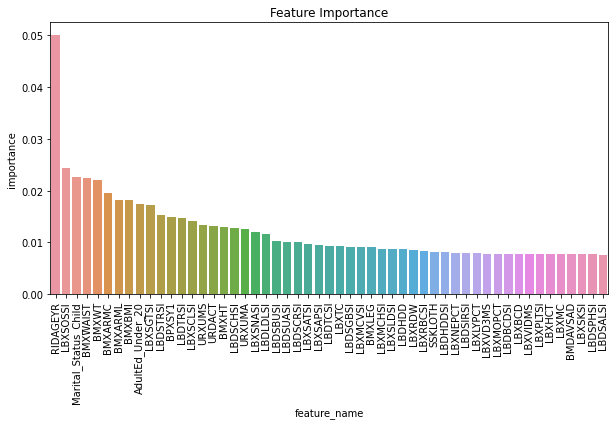

In [72]:


f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(data = top_importances, x=top_importances['feature_name'], y=top_importances['importance'])
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()



In [79]:
import joblib

In [80]:
filename = 'tuned_original_RF_model.sav'
joblib.dump(final_clf, filename)

['tuned_original_RF_model.sav']

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/X_train_ROS.csv', index_col=[0])
y_train = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/y_train_ROS.csv', index_col=[0])
X_test = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/X_test.csv', index_col=[0])
y_test = pd.read_csv('/content/drive/MyDrive/NHANES/Oversampled_split_data/y_test.csv', index_col=[0])

In [ ]:
features = X_train.columns

In [ ]:
y_test.value_counts()

Diabetes_status
1                  8419
2                  2692
3                  1067
dtype: int64

In [ ]:
y_train.value_counts()

Diabetes_status
1                  25265
2                  25265
3                  25265
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test = le.fit_transform(y_test)

In [ ]:
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [85]:
X_train_reduced = X_train[top_importances['feature_name']]

X_train_reduced.head()

,RIDAGEYR,LBXSOSSI,Marital_Status_Child,BMXWAIST,BMXWT,BMXARMC,BMXARML,BMXBMI,AdultEd_Under_20,LBXSGTSI,...,LBDBCDSI,LBXBCD,LBXVIDMS,LBXPLTSI,LBXHCT,LBXMC,BMDAVSAD,LBXSKSI,LBDSPHSI,LBDSALSI
0,2.0,278.0,1,56.7,16.6,19.0,17.4,21.20,1,18.0,...,0.0,0.07,42.7,224.0,35.8,33.5,20.7,4.0,1.227,43.0
1,2.0,278.0,1,49.8,13.8,17.2,18.0,18.79,1,18.0,...,0.0,0.14,61.8,346.0,31.3,34.5,20.7,4.0,1.227,43.0
2,15.0,280.0,1,66.5,52.9,25.0,38.0,17.40,1,9.0,...,0.0,0.07,65.2,265.0,44.9,34.7,13.7,4.2,1.388,52.0
3,21.0,276.0,0,84.6,71.4,30.5,34.2,27.20,0,14.0,...,0.0,0.11,76.2,208.0,38.0,34.3,17.9,3.7,1.453,47.0
4,36.0,273.0,0,86.4,67.2,27.4,36.0,23.47,0,17.0,...,4.0,0.45,80.6,316.0,37.9,33.8,20.7,4.0,1.227,43.0


In [115]:
X_test_reduced = X_test[top_importances['feature_name']]

In [116]:
X_train_reduced_val, X_reduced_validation, y_train_val, y_validation = train_test_split(X_train_reduced, y_train, test_size=0.25)

In [117]:
training_data = {'X_train':X_train_reduced_val,'Y_train':y_train_val,
                'X_val': X_reduced_validation,'Y_val':y_validation,
                'X_test': X_test_reduced,'Y_test':y_test}

In [118]:
len(training_data['X_test'])

12178

In [89]:

clf_red = RandomForestClassifier(n_jobs=None,random_state=random_seed,
                       verbose=1)
clf_red.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.9s finished


RandomForestClassifier(verbose=1)

In [119]:
predicted_labels = clf_red.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [120]:
len(predicted_labels)

12178

In [121]:
accuracy_score(training_data['Y_test'], predicted_labels)



0.7748398751847594

In [122]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf_red, param_grid = params, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 1/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.747 total time=   9.8s
[CV 2/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 2/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.760 total time=   9.7s
[CV 3/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 3/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.752 total time=   9.6s
[CV 4/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 4/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.763 total time=   9.7s
[CV 5/5; 1/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 5/5; 1/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=100;, score=0.752 total time=   9.8s
[CV 1/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.747 total time=  14.5s
[CV 2/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.762 total time=  14.4s
[CV 3/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.747 total time=  14.4s
[CV 4/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.764 total time=  17.3s
[CV 5/5; 2/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 2/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=150;, score=0.750 total time=  14.4s
[CV 1/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.751 total time=  19.6s
[CV 2/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.760 total time=  19.1s
[CV 3/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.750 total time=  19.1s
[CV 4/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.760 total time=  19.2s
[CV 5/5; 3/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200;, score=0.749 total time=  19.3s
[CV 1/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.748 total time=  24.0s
[CV 2/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.759 total time=  24.1s
[CV 3/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.750 total time=  24.1s
[CV 4/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.761 total time=  26.0s
[CV 5/5; 4/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=250;, score=0.752 total time=  24.1s
[CV 1/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.752 total time=  31.8s
[CV 2/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.762 total time=  28.9s
[CV 3/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.747 total time=  28.7s
[CV 4/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.762 total time=  28.9s
[CV 5/5; 5/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.752 total time=  29.0s
[CV 1/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   33.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.751 total time=  33.9s
[CV 2/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   33.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.763 total time=  34.1s
[CV 3/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   32.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.752 total time=  33.5s
[CV 4/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   35.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.763 total time=  36.5s
[CV 5/5; 6/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   32.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=350;, score=0.751 total time=  33.5s
[CV 1/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.748 total time=  38.0s
[CV 2/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.763 total time=  38.0s
[CV 3/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.754 total time=  38.1s
[CV 4/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.760 total time=  37.9s
[CV 5/5; 7/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 7/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=400;, score=0.751 total time=  37.9s
[CV 1/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   44.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.750 total time=  45.5s
[CV 2/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   41.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.761 total time=  42.7s
[CV 3/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   41.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.750 total time=  42.8s
[CV 4/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   41.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.761 total time=  42.8s
[CV 5/5; 8/40] START criterion=gini, max_depth=8, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 8/40] END criterion=gini, max_depth=8, max_features=auto, n_estimators=450;, score=0.755 total time=  42.9s
[CV 1/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 1/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.776 total time=  10.7s
[CV 2/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 2/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.787 total time=  10.7s
[CV 3/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 3/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.781 total time=  10.7s
[CV 4/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 4/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.790 total time=  10.6s
[CV 5/5; 9/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[CV 5/5; 9/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=100;, score=0.782 total time=  10.7s
[CV 1/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.777 total time=  16.0s
[CV 2/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.791 total time=  19.1s
[CV 3/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.781 total time=  16.0s
[CV 4/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.790 total time=  16.0s
[CV 5/5; 10/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=150;, score=0.781 total time=  16.1s
[CV 1/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.778 total time=  21.3s
[CV 2/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.789 total time=  21.4s
[CV 3/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.780 total time=  21.3s
[CV 4/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.786 total time=  21.2s
[CV 5/5; 11/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 11/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=200;, score=0.781 total time=  21.4s
[CV 1/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   25.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.778 total time=  26.5s
[CV 2/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.791 total time=  26.6s
[CV 3/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.780 total time=  26.6s
[CV 4/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.789 total time=  29.5s
[CV 5/5; 12/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=250;, score=0.781 total time=  26.5s
[CV 1/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.780 total time=  31.8s
[CV 2/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.793 total time=  32.0s
[CV 3/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.783 total time=  32.0s
[CV 4/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.788 total time=  31.9s
[CV 5/5; 13/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 13/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=300;, score=0.780 total time=  31.8s
[CV 1/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   36.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.777 total time=  37.5s
[CV 2/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.790 total time=  40.3s
[CV 3/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   36.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.782 total time=  37.1s
[CV 4/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   36.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.790 total time=  37.2s
[CV 5/5; 14/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   36.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 14/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=350;, score=0.781 total time=  37.2s
[CV 1/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   41.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.779 total time=  42.4s
[CV 2/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.793 total time=  42.9s
[CV 3/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   41.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.782 total time=  42.3s
[CV 4/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   44.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.790 total time=  45.2s
[CV 5/5; 15/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   41.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 15/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=400;, score=0.780 total time=  42.4s
[CV 1/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   46.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.777 total time=  47.5s
[CV 2/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.794 total time=  47.7s
[CV 3/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.780 total time=  48.8s
[CV 4/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   48.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.3s finished


[CV 4/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.789 total time=  49.5s
[CV 5/5; 16/40] START criterion=gini, max_depth=9, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   47.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 16/40] END criterion=gini, max_depth=9, max_features=auto, n_estimators=450;, score=0.781 total time=  48.5s
[CV 1/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.811 total time=  11.7s
[CV 2/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.819 total time=  11.7s
[CV 3/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.815 total time=  11.6s
[CV 4/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.820 total time=  11.7s
[CV 5/5; 17/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 17/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.816 total time=  11.7s
[CV 1/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.810 total time=  17.5s
[CV 2/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.825 total time=  17.5s
[CV 3/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.812 total time=  17.5s
[CV 4/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.822 total time=  17.5s
[CV 5/5; 18/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 18/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=150;, score=0.812 total time=  17.6s
[CV 1/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.812 total time=  23.5s
[CV 2/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.827 total time=  23.5s
[CV 3/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.812 total time=  26.3s
[CV 4/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.817 total time=  23.5s
[CV 5/5; 19/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 19/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200;, score=0.812 total time=  23.4s
[CV 1/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.814 total time=  29.1s
[CV 2/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.826 total time=  29.5s
[CV 3/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.812 total time=  29.2s
[CV 4/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.824 total time=  29.1s
[CV 5/5; 20/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 20/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=250;, score=0.812 total time=  29.2s
[CV 1/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.812 total time=  35.0s
[CV 2/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.827 total time=  37.8s
[CV 3/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.815 total time=  35.0s
[CV 4/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.822 total time=  34.9s
[CV 5/5; 21/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 21/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=300;, score=0.813 total time=  35.0s
[CV 1/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.816 total time=  40.9s
[CV 2/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.829 total time=  40.9s
[CV 3/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   39.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.815 total time=  40.8s
[CV 4/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished


[CV 4/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.822 total time=  41.6s
[CV 5/5; 22/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   41.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 22/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=350;, score=0.815 total time=  42.8s
[CV 1/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.812 total time=  46.4s
[CV 2/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.829 total time=  46.6s
[CV 3/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.813 total time=  46.6s
[CV 4/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   45.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.823 total time=  46.5s
[CV 5/5; 23/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished


[CV 5/5; 23/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400;, score=0.814 total time=  48.5s
[CV 1/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.815 total time=  53.3s
[CV 2/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   51.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.830 total time=  52.4s
[CV 3/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   51.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.817 total time=  52.3s
[CV 4/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   51.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.822 total time=  52.5s
[CV 5/5; 24/40] START criterion=gini, max_depth=10, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   51.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 24/40] END criterion=gini, max_depth=10, max_features=auto, n_estimators=450;, score=0.814 total time=  52.5s
[CV 1/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.844 total time=  14.6s
[CV 2/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.856 total time=  13.7s
[CV 3/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.846 total time=  12.8s
[CV 4/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.856 total time=  12.9s
[CV 5/5; 25/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 25/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=100;, score=0.844 total time=  12.7s
[CV 1/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.843 total time=  19.1s
[CV 2/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.856 total time=  19.1s
[CV 3/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.842 total time=  19.2s
[CV 4/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.854 total time=  19.3s
[CV 5/5; 26/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 26/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=150;, score=0.847 total time=  19.2s
[CV 1/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   24.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.846 total time=  25.5s
[CV 2/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   24.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.858 total time=  25.4s
[CV 3/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.849 total time=  25.5s
[CV 4/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.850 total time=  25.5s
[CV 5/5; 27/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished


[CV 5/5; 27/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=200;, score=0.844 total time=  27.0s
[CV 1/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   32.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.847 total time=  33.3s
[CV 2/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.858 total time=  31.9s
[CV 3/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.849 total time=  31.7s
[CV 4/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.856 total time=  31.7s
[CV 5/5; 28/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   31.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 28/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=250;, score=0.846 total time=  31.9s
[CV 1/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.847 total time=  38.1s
[CV 2/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.856 total time=  38.3s
[CV 3/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.850 total time=  41.0s
[CV 4/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.858 total time=  38.2s
[CV 5/5; 29/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   37.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 29/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=300;, score=0.847 total time=  38.2s
[CV 1/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   43.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.847 total time=  44.6s
[CV 2/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   43.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.856 total time=  44.9s
[CV 3/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   43.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.846 total time=  44.5s
[CV 4/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.856 total time=  44.7s
[CV 5/5; 30/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 30/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=350;, score=0.846 total time=  47.5s
[CV 1/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   50.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.847 total time=  51.0s
[CV 2/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   50.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.857 total time=  51.2s
[CV 3/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   50.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.849 total time=  51.1s
[CV 4/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   50.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.856 total time=  51.1s
[CV 5/5; 31/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   51.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 31/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=400;, score=0.848 total time=  52.2s
[CV 1/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   55.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.849 total time=  57.1s
[CV 2/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.857 total time=  57.4s
[CV 3/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.847 total time=  58.4s
[CV 4/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.857 total time=  57.5s
[CV 5/5; 32/40] START criterion=gini, max_depth=11, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   56.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 32/40] END criterion=gini, max_depth=11, max_features=auto, n_estimators=450;, score=0.847 total time=  57.5s
[CV 1/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.872 total time=  13.9s
[CV 2/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.879 total time=  14.0s
[CV 3/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.869 total time=  13.7s
[CV 4/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.876 total time=  15.0s
[CV 5/5; 33/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 33/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=100;, score=0.868 total time=  13.8s
[CV 1/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.869 total time=  20.8s
[CV 2/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.878 total time=  20.7s
[CV 3/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.872 total time=  20.7s
[CV 4/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.874 total time=  20.8s
[CV 5/5; 34/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=150


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 34/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=150;, score=0.871 total time=  20.8s
[CV 1/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.871 total time=  27.5s
[CV 2/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   26.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.881 total time=  27.5s
[CV 3/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.874 total time=  28.9s
[CV 4/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.879 total time=  27.7s
[CV 5/5; 35/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   27.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 35/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=200;, score=0.869 total time=  27.6s
[CV 1/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.874 total time=  34.4s
[CV 2/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.879 total time=  34.5s
[CV 3/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.873 total time=  34.4s
[CV 4/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   34.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.879 total time=  35.7s
[CV 5/5; 36/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=250


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   33.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 36/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=250;, score=0.869 total time=  34.3s
[CV 1/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.872 total time=  41.1s
[CV 2/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.879 total time=  41.4s
[CV 3/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.873 total time=  41.2s
[CV 4/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.877 total time=  42.6s
[CV 5/5; 37/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=300


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 37/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=300;, score=0.871 total time=  41.3s
[CV 1/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.874 total time=  48.0s
[CV 2/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   46.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.879 total time=  47.9s
[CV 3/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.872 total time=  49.2s
[CV 4/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.878 total time=  48.0s
[CV 5/5; 38/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=350


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 38/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=350;, score=0.872 total time=  48.2s
[CV 1/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.874 total time=  54.8s
[CV 2/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   55.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.877 total time=  56.6s
[CV 3/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.871 total time=  55.0s
[CV 4/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   53.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.877 total time=  54.8s
[CV 5/5; 39/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   55.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 39/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=400;, score=0.872 total time=  56.1s
[CV 1/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.872 total time= 1.0min
[CV 2/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.879 total time= 1.0min
[CV 3/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.871 total time= 1.1min
[CV 4/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.877 total time= 1.0min
[CV 5/5; 40/40] START criterion=gini, max_depth=12, max_features=auto, n_estimators=450


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 40/40] END criterion=gini, max_depth=12, max_features=auto, n_estimators=450;, score=0.872 total time= 1.0min


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   58.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(verbose=1), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [123]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [124]:
getTrainScores(gsearch1)

({0: "mean:0.7546002882593681params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}",
  1: "mean:0.7539142136345243params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}",
  2: "mean:0.7538965507664727params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}",
  3: "mean:0.7541428855782357params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}",
  4: "mean:0.7550751727858154params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}",
  5: "mean:0.7562186485445888params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}",
  6: "mean:0.7553567141990599params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}",
  7: "mean:0.7555853567459166params{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}",
  8: "mean:0.7831686854183014params{'cri

In [125]:


clf_red_2 = gsearch1.best_estimator_

params1 = {
    'n_estimators'      : range(300, 400, 10),
    'max_depth'         : [12, 16, 20]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch2 = GridSearchCV(estimator = clf_red_2, param_grid = params1, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch2.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START max_depth=12, n_estimators=300.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 1/30] END max_depth=12, n_estimators=300;, score=0.874 total time=  41.5s
[CV 2/5; 1/30] START max_depth=12, n_estimators=300.............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 1/30] END max_depth=12, n_estimators=300;, score=0.881 total time=  41.9s
[CV 3/5; 1/30] START max_depth=12, n_estimators=300.............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 1/30] END max_depth=12, n_estimators=300;, score=0.871 total time=  43.0s
[CV 4/5; 1/30] START max_depth=12, n_estimators=300.............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/30] END max_depth=12, n_estimators=300;, score=0.875 total time=  41.6s
[CV 5/5; 1/30] START max_depth=12, n_estimators=300.............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   40.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/30] END max_depth=12, n_estimators=300;, score=0.870 total time=  41.6s
[CV 1/5; 2/30] START max_depth=12, n_estimators=310.............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/30] END max_depth=12, n_estimators=310;, score=0.872 total time=  42.9s
[CV 2/5; 2/30] START max_depth=12, n_estimators=310.............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   42.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished


[CV 2/5; 2/30] END max_depth=12, n_estimators=310;, score=0.880 total time=  43.7s
[CV 3/5; 2/30] START max_depth=12, n_estimators=310.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   42.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/30] END max_depth=12, n_estimators=310;, score=0.871 total time=  43.6s
[CV 4/5; 2/30] START max_depth=12, n_estimators=310.............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/30] END max_depth=12, n_estimators=310;, score=0.878 total time=  43.1s
[CV 5/5; 2/30] START max_depth=12, n_estimators=310.............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   42.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 2/30] END max_depth=12, n_estimators=310;, score=0.871 total time=  43.2s
[CV 1/5; 3/30] START max_depth=12, n_estimators=320.............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   43.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 3/30] END max_depth=12, n_estimators=320;, score=0.873 total time=  44.3s
[CV 2/5; 3/30] START max_depth=12, n_estimators=320.............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   44.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/30] END max_depth=12, n_estimators=320;, score=0.879 total time=  45.6s
[CV 3/5; 3/30] START max_depth=12, n_estimators=320.............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 3/30] END max_depth=12, n_estimators=320;, score=0.873 total time=  44.5s
[CV 4/5; 3/30] START max_depth=12, n_estimators=320.............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   43.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 3/30] END max_depth=12, n_estimators=320;, score=0.879 total time=  44.3s
[CV 5/5; 3/30] START max_depth=12, n_estimators=320.............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/30] END max_depth=12, n_estimators=320;, score=0.874 total time=  44.7s
[CV 1/5; 4/30] START max_depth=12, n_estimators=330.............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/30] END max_depth=12, n_estimators=330;, score=0.874 total time=  47.5s
[CV 2/5; 4/30] START max_depth=12, n_estimators=330.............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   45.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 4/30] END max_depth=12, n_estimators=330;, score=0.880 total time=  46.3s
[CV 3/5; 4/30] START max_depth=12, n_estimators=330.............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 4/30] END max_depth=12, n_estimators=330;, score=0.873 total time=  46.2s
[CV 4/5; 4/30] START max_depth=12, n_estimators=330.............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   45.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/30] END max_depth=12, n_estimators=330;, score=0.878 total time=  46.2s
[CV 5/5; 4/30] START max_depth=12, n_estimators=330.............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   46.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/30] END max_depth=12, n_estimators=330;, score=0.872 total time=  47.8s
[CV 1/5; 5/30] START max_depth=12, n_estimators=340.............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   46.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/30] END max_depth=12, n_estimators=340;, score=0.875 total time=  47.6s
[CV 2/5; 5/30] START max_depth=12, n_estimators=340.............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 5/30] END max_depth=12, n_estimators=340;, score=0.879 total time=  47.4s
[CV 3/5; 5/30] START max_depth=12, n_estimators=340.............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   46.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/30] END max_depth=12, n_estimators=340;, score=0.873 total time=  48.0s
[CV 4/5; 5/30] START max_depth=12, n_estimators=340.............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   47.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 5/30] END max_depth=12, n_estimators=340;, score=0.880 total time=  49.0s
[CV 5/5; 5/30] START max_depth=12, n_estimators=340.............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   46.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/30] END max_depth=12, n_estimators=340;, score=0.872 total time=  47.7s
[CV 1/5; 6/30] START max_depth=12, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/30] END max_depth=12, n_estimators=350;, score=0.874 total time=  49.0s
[CV 2/5; 6/30] START max_depth=12, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   49.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 6/30] END max_depth=12, n_estimators=350;, score=0.879 total time=  50.4s
[CV 3/5; 6/30] START max_depth=12, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/30] END max_depth=12, n_estimators=350;, score=0.873 total time=  48.9s
[CV 4/5; 6/30] START max_depth=12, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   47.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 6/30] END max_depth=12, n_estimators=350;, score=0.879 total time=  48.9s
[CV 5/5; 6/30] START max_depth=12, n_estimators=350.............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   48.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/30] END max_depth=12, n_estimators=350;, score=0.871 total time=  49.1s
[CV 1/5; 7/30] START max_depth=12, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/30] END max_depth=12, n_estimators=360;, score=0.872 total time=  51.8s
[CV 2/5; 7/30] START max_depth=12, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/30] END max_depth=12, n_estimators=360;, score=0.878 total time=  50.6s
[CV 3/5; 7/30] START max_depth=12, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 7/30] END max_depth=12, n_estimators=360;, score=0.871 total time=  50.5s
[CV 4/5; 7/30] START max_depth=12, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 7/30] END max_depth=12, n_estimators=360;, score=0.879 total time=  50.6s
[CV 5/5; 7/30] START max_depth=12, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   50.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 7/30] END max_depth=12, n_estimators=360;, score=0.873 total time=  51.8s
[CV 1/5; 8/30] START max_depth=12, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 8/30] END max_depth=12, n_estimators=370;, score=0.873 total time=  51.8s
[CV 2/5; 8/30] START max_depth=12, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   50.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 8/30] END max_depth=12, n_estimators=370;, score=0.879 total time=  51.7s
[CV 3/5; 8/30] START max_depth=12, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 8/30] END max_depth=12, n_estimators=370;, score=0.872 total time=  53.2s
[CV 4/5; 8/30] START max_depth=12, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 8/30] END max_depth=12, n_estimators=370;, score=0.879 total time=  51.8s
[CV 5/5; 8/30] START max_depth=12, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 8/30] END max_depth=12, n_estimators=370;, score=0.871 total time=  51.9s
[CV 1/5; 9/30] START max_depth=12, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished


[CV 1/5; 9/30] END max_depth=12, n_estimators=380;, score=0.874 total time=  53.5s
[CV 2/5; 9/30] START max_depth=12, n_estimators=380.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   53.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished


[CV 2/5; 9/30] END max_depth=12, n_estimators=380;, score=0.880 total time=  55.4s
[CV 3/5; 9/30] START max_depth=12, n_estimators=380.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   52.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 9/30] END max_depth=12, n_estimators=380;, score=0.870 total time=  53.6s
[CV 4/5; 9/30] START max_depth=12, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   52.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 9/30] END max_depth=12, n_estimators=380;, score=0.881 total time=  53.3s
[CV 5/5; 9/30] START max_depth=12, n_estimators=380.............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   54.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 9/30] END max_depth=12, n_estimators=380;, score=0.872 total time=  55.2s
[CV 1/5; 10/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   53.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 10/30] END max_depth=12, n_estimators=390;, score=0.875 total time=  54.9s
[CV 2/5; 10/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   53.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 10/30] END max_depth=12, n_estimators=390;, score=0.879 total time=  54.6s
[CV 3/5; 10/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   53.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 10/30] END max_depth=12, n_estimators=390;, score=0.871 total time=  54.7s
[CV 4/5; 10/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   54.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/30] END max_depth=12, n_estimators=390;, score=0.878 total time=  56.1s
[CV 5/5; 10/30] START max_depth=12, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/30] END max_depth=12, n_estimators=390;, score=0.872 total time=  55.1s
[CV 1/5; 11/30] START max_depth=16, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   50.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 11/30] END max_depth=16, n_estimators=300;, score=0.908 total time=  52.0s
[CV 2/5; 11/30] START max_depth=16, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   51.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 11/30] END max_depth=16, n_estimators=300;, score=0.913 total time=  53.0s
[CV 3/5; 11/30] START max_depth=16, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/30] END max_depth=16, n_estimators=300;, score=0.910 total time=  51.8s
[CV 4/5; 11/30] START max_depth=16, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   50.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 11/30] END max_depth=16, n_estimators=300;, score=0.910 total time=  51.4s
[CV 5/5; 11/30] START max_depth=16, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   50.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 11/30] END max_depth=16, n_estimators=300;, score=0.910 total time=  51.6s
[CV 1/5; 12/30] START max_depth=16, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   53.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/30] END max_depth=16, n_estimators=310;, score=0.910 total time=  54.2s
[CV 2/5; 12/30] START max_depth=16, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   51.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/30] END max_depth=16, n_estimators=310;, score=0.913 total time=  52.8s
[CV 3/5; 12/30] START max_depth=16, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   51.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/30] END max_depth=16, n_estimators=310;, score=0.912 total time=  52.9s
[CV 4/5; 12/30] START max_depth=16, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   51.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 12/30] END max_depth=16, n_estimators=310;, score=0.910 total time=  52.9s
[CV 5/5; 12/30] START max_depth=16, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   52.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/30] END max_depth=16, n_estimators=310;, score=0.911 total time=  53.8s
[CV 1/5; 13/30] START max_depth=16, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   53.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 13/30] END max_depth=16, n_estimators=320;, score=0.908 total time=  54.3s
[CV 2/5; 13/30] START max_depth=16, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   53.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 13/30] END max_depth=16, n_estimators=320;, score=0.913 total time=  54.8s
[CV 3/5; 13/30] START max_depth=16, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   54.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 13/30] END max_depth=16, n_estimators=320;, score=0.911 total time=  56.1s
[CV 4/5; 13/30] START max_depth=16, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   53.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 13/30] END max_depth=16, n_estimators=320;, score=0.910 total time=  54.7s
[CV 5/5; 13/30] START max_depth=16, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   53.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 13/30] END max_depth=16, n_estimators=320;, score=0.911 total time=  54.8s
[CV 1/5; 14/30] START max_depth=16, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   54.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 14/30] END max_depth=16, n_estimators=330;, score=0.910 total time=  56.0s
[CV 2/5; 14/30] START max_depth=16, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 14/30] END max_depth=16, n_estimators=330;, score=0.914 total time=  57.9s
[CV 3/5; 14/30] START max_depth=16, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   55.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 14/30] END max_depth=16, n_estimators=330;, score=0.912 total time=  56.5s
[CV 4/5; 14/30] START max_depth=16, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   55.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 14/30] END max_depth=16, n_estimators=330;, score=0.910 total time=  56.3s
[CV 5/5; 14/30] START max_depth=16, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   55.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 14/30] END max_depth=16, n_estimators=330;, score=0.911 total time=  56.9s
[CV 1/5; 15/30] START max_depth=16, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   57.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 15/30] END max_depth=16, n_estimators=340;, score=0.908 total time=  58.4s
[CV 2/5; 15/30] START max_depth=16, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   56.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 15/30] END max_depth=16, n_estimators=340;, score=0.914 total time=  57.9s
[CV 3/5; 15/30] START max_depth=16, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 15/30] END max_depth=16, n_estimators=340;, score=0.912 total time=  59.3s
[CV 4/5; 15/30] START max_depth=16, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   56.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 15/30] END max_depth=16, n_estimators=340;, score=0.909 total time=  58.2s
[CV 5/5; 15/30] START max_depth=16, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:   56.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 15/30] END max_depth=16, n_estimators=340;, score=0.911 total time=  57.5s
[CV 1/5; 16/30] START max_depth=16, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   57.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 16/30] END max_depth=16, n_estimators=350;, score=0.910 total time=  59.2s
[CV 2/5; 16/30] START max_depth=16, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   59.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 16/30] END max_depth=16, n_estimators=350;, score=0.912 total time= 1.0min
[CV 3/5; 16/30] START max_depth=16, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 16/30] END max_depth=16, n_estimators=350;, score=0.912 total time=  58.9s
[CV 4/5; 16/30] START max_depth=16, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   57.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 16/30] END max_depth=16, n_estimators=350;, score=0.911 total time=  59.1s
[CV 5/5; 16/30] START max_depth=16, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:   59.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 16/30] END max_depth=16, n_estimators=350;, score=0.911 total time= 1.0min
[CV 1/5; 17/30] START max_depth=16, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 17/30] END max_depth=16, n_estimators=360;, score=0.909 total time= 1.0min
[CV 2/5; 17/30] START max_depth=16, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 17/30] END max_depth=16, n_estimators=360;, score=0.913 total time= 1.0min
[CV 3/5; 17/30] START max_depth=16, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 17/30] END max_depth=16, n_estimators=360;, score=0.911 total time= 1.0min
[CV 4/5; 17/30] START max_depth=16, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 17/30] END max_depth=16, n_estimators=360;, score=0.910 total time= 1.0min
[CV 5/5; 17/30] START max_depth=16, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   59.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 17/30] END max_depth=16, n_estimators=360;, score=0.910 total time= 1.0min
[CV 1/5; 18/30] START max_depth=16, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 18/30] END max_depth=16, n_estimators=370;, score=0.911 total time= 1.1min
[CV 2/5; 18/30] START max_depth=16, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 18/30] END max_depth=16, n_estimators=370;, score=0.912 total time= 1.0min
[CV 3/5; 18/30] START max_depth=16, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 18/30] END max_depth=16, n_estimators=370;, score=0.910 total time= 1.0min
[CV 4/5; 18/30] START max_depth=16, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 18/30] END max_depth=16, n_estimators=370;, score=0.911 total time= 1.1min
[CV 5/5; 18/30] START max_depth=16, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 18/30] END max_depth=16, n_estimators=370;, score=0.910 total time= 1.0min
[CV 1/5; 19/30] START max_depth=16, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 19/30] END max_depth=16, n_estimators=380;, score=0.908 total time= 1.1min
[CV 2/5; 19/30] START max_depth=16, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 19/30] END max_depth=16, n_estimators=380;, score=0.912 total time= 1.1min
[CV 3/5; 19/30] START max_depth=16, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 19/30] END max_depth=16, n_estimators=380;, score=0.910 total time= 1.1min
[CV 4/5; 19/30] START max_depth=16, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 19/30] END max_depth=16, n_estimators=380;, score=0.912 total time= 1.1min
[CV 5/5; 19/30] START max_depth=16, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 19/30] END max_depth=16, n_estimators=380;, score=0.911 total time= 1.1min
[CV 1/5; 20/30] START max_depth=16, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 20/30] END max_depth=16, n_estimators=390;, score=0.909 total time= 1.1min
[CV 2/5; 20/30] START max_depth=16, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 20/30] END max_depth=16, n_estimators=390;, score=0.913 total time= 1.1min
[CV 3/5; 20/30] START max_depth=16, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 20/30] END max_depth=16, n_estimators=390;, score=0.911 total time= 1.1min
[CV 4/5; 20/30] START max_depth=16, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 20/30] END max_depth=16, n_estimators=390;, score=0.911 total time= 1.1min
[CV 5/5; 20/30] START max_depth=16, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 20/30] END max_depth=16, n_estimators=390;, score=0.911 total time= 1.2min
[CV 1/5; 21/30] START max_depth=20, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   55.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 21/30] END max_depth=20, n_estimators=300;, score=0.917 total time=  56.4s
[CV 2/5; 21/30] START max_depth=20, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 21/30] END max_depth=20, n_estimators=300;, score=0.916 total time=  55.4s
[CV 3/5; 21/30] START max_depth=20, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 21/30] END max_depth=20, n_estimators=300;, score=0.918 total time=  55.4s
[CV 4/5; 21/30] START max_depth=20, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   55.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 21/30] END max_depth=20, n_estimators=300;, score=0.917 total time=  56.4s
[CV 5/5; 21/30] START max_depth=20, n_estimators=300............................


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   54.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 21/30] END max_depth=20, n_estimators=300;, score=0.915 total time=  55.3s
[CV 1/5; 22/30] START max_depth=20, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   55.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 22/30] END max_depth=20, n_estimators=310;, score=0.918 total time=  56.9s
[CV 2/5; 22/30] START max_depth=20, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   55.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 22/30] END max_depth=20, n_estimators=310;, score=0.920 total time=  56.9s
[CV 3/5; 22/30] START max_depth=20, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   56.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 22/30] END max_depth=20, n_estimators=310;, score=0.918 total time=  58.0s
[CV 4/5; 22/30] START max_depth=20, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   55.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 22/30] END max_depth=20, n_estimators=310;, score=0.917 total time=  57.1s
[CV 5/5; 22/30] START max_depth=20, n_estimators=310............................


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 22/30] END max_depth=20, n_estimators=310;, score=0.918 total time=  57.4s
[CV 1/5; 23/30] START max_depth=20, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   59.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 23/30] END max_depth=20, n_estimators=320;, score=0.918 total time= 1.0min
[CV 2/5; 23/30] START max_depth=20, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   57.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 23/30] END max_depth=20, n_estimators=320;, score=0.919 total time=  58.8s
[CV 3/5; 23/30] START max_depth=20, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   57.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 23/30] END max_depth=20, n_estimators=320;, score=0.919 total time=  58.7s
[CV 4/5; 23/30] START max_depth=20, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 23/30] END max_depth=20, n_estimators=320;, score=0.917 total time= 1.0min
[CV 5/5; 23/30] START max_depth=20, n_estimators=320............................


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   58.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 23/30] END max_depth=20, n_estimators=320;, score=0.916 total time=  59.5s
[CV 1/5; 24/30] START max_depth=20, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   59.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 24/30] END max_depth=20, n_estimators=330;, score=0.917 total time= 1.0min
[CV 2/5; 24/30] START max_depth=20, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   59.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 24/30] END max_depth=20, n_estimators=330;, score=0.918 total time= 1.0min
[CV 3/5; 24/30] START max_depth=20, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 24/30] END max_depth=20, n_estimators=330;, score=0.920 total time= 1.0min
[CV 4/5; 24/30] START max_depth=20, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   59.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 24/30] END max_depth=20, n_estimators=330;, score=0.918 total time= 1.0min
[CV 5/5; 24/30] START max_depth=20, n_estimators=330............................


[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   59.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 24/30] END max_depth=20, n_estimators=330;, score=0.915 total time= 1.0min
[CV 1/5; 25/30] START max_depth=20, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 25/30] END max_depth=20, n_estimators=340;, score=0.918 total time= 1.1min
[CV 2/5; 25/30] START max_depth=20, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 25/30] END max_depth=20, n_estimators=340;, score=0.919 total time= 1.0min
[CV 3/5; 25/30] START max_depth=20, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 25/30] END max_depth=20, n_estimators=340;, score=0.918 total time= 1.0min
[CV 4/5; 25/30] START max_depth=20, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 25/30] END max_depth=20, n_estimators=340;, score=0.919 total time= 1.1min
[CV 5/5; 25/30] START max_depth=20, n_estimators=340............................


[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 25/30] END max_depth=20, n_estimators=340;, score=0.918 total time= 1.0min
[CV 1/5; 26/30] START max_depth=20, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 26/30] END max_depth=20, n_estimators=350;, score=0.916 total time= 1.1min
[CV 2/5; 26/30] START max_depth=20, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 26/30] END max_depth=20, n_estimators=350;, score=0.919 total time= 1.1min
[CV 3/5; 26/30] START max_depth=20, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 26/30] END max_depth=20, n_estimators=350;, score=0.920 total time= 1.1min
[CV 4/5; 26/30] START max_depth=20, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 26/30] END max_depth=20, n_estimators=350;, score=0.919 total time= 1.1min
[CV 5/5; 26/30] START max_depth=20, n_estimators=350............................


[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 26/30] END max_depth=20, n_estimators=350;, score=0.916 total time= 1.1min
[CV 1/5; 27/30] START max_depth=20, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 27/30] END max_depth=20, n_estimators=360;, score=0.918 total time= 1.1min
[CV 2/5; 27/30] START max_depth=20, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 27/30] END max_depth=20, n_estimators=360;, score=0.918 total time= 1.1min
[CV 3/5; 27/30] START max_depth=20, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 27/30] END max_depth=20, n_estimators=360;, score=0.919 total time= 1.1min
[CV 4/5; 27/30] START max_depth=20, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 27/30] END max_depth=20, n_estimators=360;, score=0.918 total time= 1.1min
[CV 5/5; 27/30] START max_depth=20, n_estimators=360............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 27/30] END max_depth=20, n_estimators=360;, score=0.916 total time= 1.1min
[CV 1/5; 28/30] START max_depth=20, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 28/30] END max_depth=20, n_estimators=370;, score=0.916 total time= 1.2min
[CV 2/5; 28/30] START max_depth=20, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 28/30] END max_depth=20, n_estimators=370;, score=0.919 total time= 1.1min
[CV 3/5; 28/30] START max_depth=20, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 28/30] END max_depth=20, n_estimators=370;, score=0.920 total time= 1.1min
[CV 4/5; 28/30] START max_depth=20, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 28/30] END max_depth=20, n_estimators=370;, score=0.918 total time= 1.2min
[CV 5/5; 28/30] START max_depth=20, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 28/30] END max_depth=20, n_estimators=370;, score=0.919 total time= 1.1min
[CV 1/5; 29/30] START max_depth=20, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 29/30] END max_depth=20, n_estimators=380;, score=0.917 total time= 1.2min
[CV 2/5; 29/30] START max_depth=20, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 29/30] END max_depth=20, n_estimators=380;, score=0.919 total time= 1.2min
[CV 3/5; 29/30] START max_depth=20, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 29/30] END max_depth=20, n_estimators=380;, score=0.920 total time= 1.2min
[CV 4/5; 29/30] START max_depth=20, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 29/30] END max_depth=20, n_estimators=380;, score=0.918 total time= 1.2min
[CV 5/5; 29/30] START max_depth=20, n_estimators=380............................


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 29/30] END max_depth=20, n_estimators=380;, score=0.917 total time= 1.2min
[CV 1/5; 30/30] START max_depth=20, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 30/30] END max_depth=20, n_estimators=390;, score=0.918 total time= 1.2min
[CV 2/5; 30/30] START max_depth=20, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 30/30] END max_depth=20, n_estimators=390;, score=0.919 total time= 1.2min
[CV 3/5; 30/30] START max_depth=20, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 30/30] END max_depth=20, n_estimators=390;, score=0.920 total time= 1.2min
[CV 4/5; 30/30] START max_depth=20, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 30/30] END max_depth=20, n_estimators=390;, score=0.918 total time= 1.2min
[CV 5/5; 30/30] START max_depth=20, n_estimators=390............................


[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 30/30] END max_depth=20, n_estimators=390;, score=0.917 total time= 1.2min


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_estimators=350,
                                              verbose=1),
             n_jobs=1,
             param_grid={'max_depth': [12, 16, 20],
                         'n_estimators': range(300, 400, 10)},
             scoring='f1_micro', verbose=10)

In [126]:
getTrainScores(gsearch2)

({0: "mean:0.8742743622371718params{'max_depth': 12, 'n_estimators': 300}",
  1: "mean:0.8743447584209031params{'max_depth': 12, 'n_estimators': 310}",
  2: "mean:0.875576157077606params{'max_depth': 12, 'n_estimators': 320}",
  3: "mean:0.8753650443393532params{'max_depth': 12, 'n_estimators': 330}",
  4: "mean:0.8756289105069233params{'max_depth': 12, 'n_estimators': 340}",
  5: "mean:0.8751891227305532params{'max_depth': 12, 'n_estimators': 350}",
  6: "mean:0.8744327261877162params{'max_depth': 12, 'n_estimators': 360}",
  7: "mean:0.8747493519734147params{'max_depth': 12, 'n_estimators': 370}",
  8: "mean:0.8754178116934963params{'max_depth': 12, 'n_estimators': 380}",
  9: "mean:0.8750659731175048params{'max_depth': 12, 'n_estimators': 390}",
  10: "mean:0.9101608294183299params{'max_depth': 16, 'n_estimators': 300}",
  11: "mean:0.9111283386994197params{'max_depth': 16, 'n_estimators': 310}",
  12: "mean:0.9105302488606204params{'max_depth': 16, 'n_estimators': 320}",
  13: "mea

In [127]:
clf_red_3 = gsearch2.best_estimator_


params = {
    'n_estimators'      : range(360, 380, 5),
    'max_depth'         : [20, 25, 30]
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch3 = GridSearchCV(estimator = clf_red_3, param_grid = params, scoring='f1_micro',n_jobs=1,verbose = 10, cv=5)
gsearch3.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=20, n_estimators=360.............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 1/12] END max_depth=20, n_estimators=360;, score=0.917 total time= 1.2min
[CV 2/5; 1/12] START max_depth=20, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 1/12] END max_depth=20, n_estimators=360;, score=0.920 total time= 1.1min
[CV 3/5; 1/12] START max_depth=20, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 1/12] END max_depth=20, n_estimators=360;, score=0.919 total time= 1.1min
[CV 4/5; 1/12] START max_depth=20, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 1/12] END max_depth=20, n_estimators=360;, score=0.919 total time= 1.2min
[CV 5/5; 1/12] START max_depth=20, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 1/12] END max_depth=20, n_estimators=360;, score=0.917 total time= 1.1min
[CV 1/5; 2/12] START max_depth=20, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 2/12] END max_depth=20, n_estimators=365;, score=0.917 total time= 1.1min
[CV 2/5; 2/12] START max_depth=20, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 2/12] END max_depth=20, n_estimators=365;, score=0.920 total time= 1.2min
[CV 3/5; 2/12] START max_depth=20, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 2/12] END max_depth=20, n_estimators=365;, score=0.920 total time= 1.1min
[CV 4/5; 2/12] START max_depth=20, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 2/12] END max_depth=20, n_estimators=365;, score=0.917 total time= 1.1min
[CV 5/5; 2/12] START max_depth=20, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 2/12] END max_depth=20, n_estimators=365;, score=0.917 total time= 1.2min
[CV 1/5; 3/12] START max_depth=20, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 3/12] END max_depth=20, n_estimators=370;, score=0.917 total time= 1.1min
[CV 2/5; 3/12] START max_depth=20, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 3/12] END max_depth=20, n_estimators=370;, score=0.920 total time= 1.1min
[CV 3/5; 3/12] START max_depth=20, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 3/12] END max_depth=20, n_estimators=370;, score=0.920 total time= 1.2min
[CV 4/5; 3/12] START max_depth=20, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 3/12] END max_depth=20, n_estimators=370;, score=0.918 total time= 1.1min
[CV 5/5; 3/12] START max_depth=20, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 3/12] END max_depth=20, n_estimators=370;, score=0.919 total time= 1.2min
[CV 1/5; 4/12] START max_depth=20, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 4/12] END max_depth=20, n_estimators=375;, score=0.917 total time= 1.2min
[CV 2/5; 4/12] START max_depth=20, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 4/12] END max_depth=20, n_estimators=375;, score=0.920 total time= 1.2min
[CV 3/5; 4/12] START max_depth=20, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 4/12] END max_depth=20, n_estimators=375;, score=0.919 total time= 1.2min
[CV 4/5; 4/12] START max_depth=20, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 4/12] END max_depth=20, n_estimators=375;, score=0.919 total time= 1.2min
[CV 5/5; 4/12] START max_depth=20, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 4/12] END max_depth=20, n_estimators=375;, score=0.916 total time= 1.2min
[CV 1/5; 5/12] START max_depth=25, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 5/12] END max_depth=25, n_estimators=360;, score=0.920 total time= 1.2min
[CV 2/5; 5/12] START max_depth=25, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 5/12] END max_depth=25, n_estimators=360;, score=0.920 total time= 1.1min
[CV 3/5; 5/12] START max_depth=25, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 5/12] END max_depth=25, n_estimators=360;, score=0.922 total time= 1.1min
[CV 4/5; 5/12] START max_depth=25, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 5/12] END max_depth=25, n_estimators=360;, score=0.921 total time= 1.2min
[CV 5/5; 5/12] START max_depth=25, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 5/12] END max_depth=25, n_estimators=360;, score=0.920 total time= 1.1min
[CV 1/5; 6/12] START max_depth=25, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 6/12] END max_depth=25, n_estimators=365;, score=0.919 total time= 1.2min
[CV 2/5; 6/12] START max_depth=25, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 6/12] END max_depth=25, n_estimators=365;, score=0.921 total time= 1.2min
[CV 3/5; 6/12] START max_depth=25, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 6/12] END max_depth=25, n_estimators=365;, score=0.922 total time= 1.2min
[CV 4/5; 6/12] START max_depth=25, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 6/12] END max_depth=25, n_estimators=365;, score=0.921 total time= 1.2min
[CV 5/5; 6/12] START max_depth=25, n_estimators=365.............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 6/12] END max_depth=25, n_estimators=365;, score=0.920 total time= 1.2min
[CV 1/5; 7/12] START max_depth=25, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 7/12] END max_depth=25, n_estimators=370;, score=0.920 total time= 1.2min
[CV 2/5; 7/12] START max_depth=25, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 7/12] END max_depth=25, n_estimators=370;, score=0.920 total time= 1.2min
[CV 3/5; 7/12] START max_depth=25, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 7/12] END max_depth=25, n_estimators=370;, score=0.922 total time= 1.2min
[CV 4/5; 7/12] START max_depth=25, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 7/12] END max_depth=25, n_estimators=370;, score=0.922 total time= 1.2min
[CV 5/5; 7/12] START max_depth=25, n_estimators=370.............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 7/12] END max_depth=25, n_estimators=370;, score=0.919 total time= 1.2min
[CV 1/5; 8/12] START max_depth=25, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 8/12] END max_depth=25, n_estimators=375;, score=0.920 total time= 1.2min
[CV 2/5; 8/12] START max_depth=25, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 8/12] END max_depth=25, n_estimators=375;, score=0.921 total time= 1.2min
[CV 3/5; 8/12] START max_depth=25, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 8/12] END max_depth=25, n_estimators=375;, score=0.921 total time= 1.2min
[CV 4/5; 8/12] START max_depth=25, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 8/12] END max_depth=25, n_estimators=375;, score=0.920 total time= 1.2min
[CV 5/5; 8/12] START max_depth=25, n_estimators=375.............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 8/12] END max_depth=25, n_estimators=375;, score=0.920 total time= 1.2min
[CV 1/5; 9/12] START max_depth=30, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 9/12] END max_depth=30, n_estimators=360;, score=0.921 total time= 1.1min
[CV 2/5; 9/12] START max_depth=30, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 9/12] END max_depth=30, n_estimators=360;, score=0.922 total time= 1.2min
[CV 3/5; 9/12] START max_depth=30, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 9/12] END max_depth=30, n_estimators=360;, score=0.922 total time= 1.2min
[CV 4/5; 9/12] START max_depth=30, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 9/12] END max_depth=30, n_estimators=360;, score=0.921 total time= 1.2min
[CV 5/5; 9/12] START max_depth=30, n_estimators=360.............................


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 9/12] END max_depth=30, n_estimators=360;, score=0.920 total time= 1.2min
[CV 1/5; 10/12] START max_depth=30, n_estimators=365............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 10/12] END max_depth=30, n_estimators=365;, score=0.921 total time= 1.2min
[CV 2/5; 10/12] START max_depth=30, n_estimators=365............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 10/12] END max_depth=30, n_estimators=365;, score=0.923 total time= 1.2min
[CV 3/5; 10/12] START max_depth=30, n_estimators=365............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 10/12] END max_depth=30, n_estimators=365;, score=0.923 total time= 1.2min
[CV 4/5; 10/12] START max_depth=30, n_estimators=365............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 10/12] END max_depth=30, n_estimators=365;, score=0.921 total time= 1.2min
[CV 5/5; 10/12] START max_depth=30, n_estimators=365............................


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 10/12] END max_depth=30, n_estimators=365;, score=0.922 total time= 1.2min
[CV 1/5; 11/12] START max_depth=30, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 11/12] END max_depth=30, n_estimators=370;, score=0.920 total time= 1.2min
[CV 2/5; 11/12] START max_depth=30, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 11/12] END max_depth=30, n_estimators=370;, score=0.921 total time= 1.2min
[CV 3/5; 11/12] START max_depth=30, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 11/12] END max_depth=30, n_estimators=370;, score=0.923 total time= 1.2min
[CV 4/5; 11/12] START max_depth=30, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 11/12] END max_depth=30, n_estimators=370;, score=0.921 total time= 1.2min
[CV 5/5; 11/12] START max_depth=30, n_estimators=370............................


[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 370 out of 370 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 11/12] END max_depth=30, n_estimators=370;, score=0.920 total time= 1.2min
[CV 1/5; 12/12] START max_depth=30, n_estimators=375............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5; 12/12] END max_depth=30, n_estimators=375;, score=0.921 total time= 1.2min
[CV 2/5; 12/12] START max_depth=30, n_estimators=375............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/5; 12/12] END max_depth=30, n_estimators=375;, score=0.923 total time= 1.2min
[CV 3/5; 12/12] START max_depth=30, n_estimators=375............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5; 12/12] END max_depth=30, n_estimators=375;, score=0.923 total time= 1.2min
[CV 4/5; 12/12] START max_depth=30, n_estimators=375............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 4/5; 12/12] END max_depth=30, n_estimators=375;, score=0.922 total time= 1.2min
[CV 5/5; 12/12] START max_depth=30, n_estimators=375............................


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 5/5; 12/12] END max_depth=30, n_estimators=375;, score=0.920 total time= 1.2min


[Parallel(n_jobs=1)]: Done 365 out of 365 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=370,
                                              verbose=1),
             n_jobs=1,
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': range(360, 380, 5)},
             scoring='f1_micro', verbose=10)

In [128]:
getTrainScores(gsearch3)

({0: "mean:0.9183583991803538params{'max_depth': 20, 'n_estimators': 360}",
  1: "mean:0.9183056209957907params{'max_depth': 20, 'n_estimators': 365}",
  2: "mean:0.9186750450796899params{'max_depth': 20, 'n_estimators': 370}",
  3: "mean:0.9181121045958657params{'max_depth': 20, 'n_estimators': 375}",
  4: "mean:0.9204341714299241params{'max_depth': 25, 'n_estimators': 360}",
  5: "mean:0.9207156401246334params{'max_depth': 25, 'n_estimators': 365}",
  6: "mean:0.9205924796811648params{'max_depth': 25, 'n_estimators': 370}",
  7: "mean:0.920592488964382params{'max_depth': 25, 'n_estimators': 375}",
  8: "mean:0.9212961367195106params{'max_depth': 30, 'n_estimators': 360}",
  9: "mean:0.9217359384207064params{'max_depth': 30, 'n_estimators': 365}",
  10: "mean:0.9209619099538756params{'max_depth': 30, 'n_estimators': 370}",
  11: "mean:0.9216479644650821params{'max_depth': 30, 'n_estimators': 375}"},
 {'best_mean': 0.9217359384207064,
  'best_param': {'max_depth': 30, 'n_estimators': 3

In [7]:
xgboost.set_config(verbosity=2)

In [73]:
# create a GPU XGBoost classifier
model = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 3
)

In [74]:
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}

In [75]:
scoring = {
    'AUC': 'roc_auc', 
    'Accuracy': make_scorer(accuracy_score)
}

In [76]:
# create the Kfold object
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, random_state= random_seed)

# create the grid search object
n_iter=10

In [77]:
grid = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)

In [ ]:
model = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 3, 
    n_estimators = 200,
    learning_rate = 0.1,
    colsample_bytree = 0.6,
    subsample = 0.6,
    max_depth = 4,
    reg_lambda = 1,
    gamma = 0.1
)

In [78]:
%time
# fit grid search
best_model = model.fit(X_train,y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
[08:30:06] ======== Monitor (0): HostSketchContainer ========
[08:30:06] AllReduce: 0.05512s, 1 calls @ 55120us

[08:30:06] MakeCuts: 0.058005s, 1 calls @ 58005us

[08:30:06] DEBUG: ../src/tree/updater_gpu_hist.cu:736: [GPU Hist]: Configure
[08:30:06] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: ignored

In [15]:
best_model.score(X_test, y_test)

[17:48:00] DEBUG: ../src/tree/updater_gpu_hist.cu:736: [GPU Hist]: Configure


0.7875677451141403

In [18]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

NameError: ignored

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [37]:
model = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 2, 
    n_estimators = 400,
    learning_rate = 0.1,
    colsample_bytree = 0.6,
    subsample = 0.6,
    max_depth = 4,
    reg_lambda = 1,
    gamma = 0.1
)

In [38]:
%time
# fit grid search
best_model = model.fit(X_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [19]:
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 87.30% (0.67%)


In [40]:
best_model.score(X_test, y_test)

0.779191985547709

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

[17:48:54] ======== Monitor (0): HostSketchContainer ========
[17:48:54] AllReduce: 0.038651s, 1 calls @ 38651us

[17:48:54] MakeCuts: 0.03906s, 1 calls @ 39060us

[17:48:54] DEBUG: ../src/tree/updater_gpu_hist.cu:736: [GPU Hist]: Configure
[17:48:54] ======== Monitor (0):  ========
[17:48:54] InitCompressedData: 0.000546s, 1 calls @ 546us

[17:48:56] ======== Monitor (0): Learner ========
[17:48:56] Configure: 0.001081s, 1 calls @ 1081us

[17:48:56] EvalOneIter: 0.000612s, 100 calls @ 612us

[17:48:56] GetGradient: 0.005838s, 100 calls @ 5838us

[17:48:56] PredictRaw: 0.000201s, 100 calls @ 201us

[17:48:56] UpdateOneIter: 1.81706s, 100 calls @ 1817055us

[17:48:56] ======== Monitor (0): GBTree ========
[17:48:56] BoostNewTrees: 1.80849s, 100 calls @ 1808487us

[17:48:56] CommitModel: 4.2e-05s, 100 calls @ 42us

[17:48:56] ======== Device 0 Memory Allocations:  ========
[17:48:56] Peak memory usage: 91MiB
[17:48:56] Number of allocations: 32046
[17:48:56] ======== Monitor (0): updater

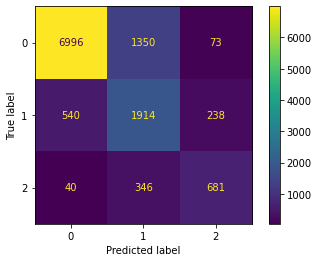

In [17]:
best_model.fit(X_train, y_train)
y_pred= best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(best_model, acc))
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()

In [44]:


model_pos_100 = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 2, 
    n_estimators = 400,
    learning_rate = 0.1,
    colsample_bytree = 0.6,
    subsample = 0.6,
    max_depth = 4,
    reg_lambda = 1,
    gamma = 0.1, 
    scale_pos_weight=100
)

In [45]:


results = cross_val_score(model_pos_100, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[14:40:31] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:40:37] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:40:42] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:40:48] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:40:53] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:40:59] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:41:04] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:41:10] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:41:15] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[14:41:21] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy: 87.30% (0.67%)


[14:43:47] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['error', 'auc'],
              feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...) is 0.779191985547709
              precision    recall  f1-score   support

     class 1       0.94      0.81    

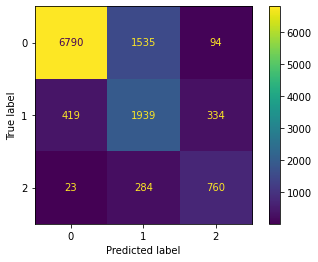

In [46]:
model_pos_100.fit(X_train, y_train)
y_pred= model_pos_100.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(model_pos_100, acc))
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=model_pos_100.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_pos_100.classes_).plot()
plt.show()

In [52]:
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size=0.25)

In [59]:
y_validation

array([2, 0, 1, ..., 2, 2, 0])

In [22]:
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],}

In [33]:
colsample_bytree = random.choice(param_grid['colsample_bytree'])
colsample_bytree

0.6

In [37]:
models_trained = []

for i in range(10):
  

  learning_rate = random.choice(param_grid['learning_rate']), 
  colsample_bytree = 0.8,
  subsample = random.choice(param_grid['subsample']),
  max_depth = random.choice(param_grid['max_depth']),
  reg_lambda = random.choice(param_grid['reg_lambda']),
  gamma = random.choice(param_grid['gamma'])



  model_params = []
  model = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 2, 
    
    learning_rate = learning_rate,
    
    colsample_bytree = 0.8,
    
    subsample = subsample,
    
    max_depth = max_depth,
    
    reg_lambda = reg_lambda,
    
    gamma = gamma)
    
  model_params.append('learning_rate:'),
  model_params.append(learning_rate),
  model_params.append('colsample_bytree:'),
  model_params.append(colsample_bytree),
  model_params.append('subsample:'),
  model_params.append(subsample),    
  model_params.append('max_depth:'),
  model_params.append(max_depth),
  model_params.append('reg_lambda:'),
  model_params.append(reg_lambda),
  model_params.append('gamma:'),
  model_params.append(gamma)

  
  
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  model_params.append(acc)
  models_trained.append(model_params)
  print("Accuracy of %s is %s"%(model, acc))
  target_names = ['class 1', 'class 2', 'class 3']
  print(classification_report(y_test, y_pred, target_names=target_names))
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
  plt.show()

XGBoostError: ignored

In [48]:


model_stop_20 = xgboost.XGBClassifier(
    tree_method = "gpu_hist",
    random_state= random_seed, 
    eval_metric=["error", "auc"], 
    verbosity = 2, 
    n_estimators = 400,
    learning_rate = 0.1,
    colsample_bytree = 0.6,
    subsample = 0.6,
    max_depth = 4,
    reg_lambda = 1,
    gamma = 0.1, 
    # scale_pos_weight=100, 

)

In [60]:
model_stop_20.fit(X_train_val, y_train, eval_set=[(X_train_val, y_train), (X_validation, y_validation)]) 

XGBoostError: ignored

In [49]:


results = cross_val_score(model_stop_20, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: nan% (nan%)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    ret

In [51]:
model_stop_20.fit(X_train, y_train)
y_pred= model_stop_20.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(model_stop_20, acc))
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=model_stop_20.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_stop_20.classes_).plot()
plt.show()

AssertionError: ignored